In [1]:
from mlxtend.plotting import plot_decision_regions
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from scipy.stats import ttest_1samp
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
#plt.style.use('ggplot')
#ggplot is R based visualisation package that provides better graphics with higher level of abstraction

In [2]:
df = pd.read_excel('/content/GameAddictionIMP.xlsx')
df

,thinkofPlayingGameDayLong,spendFreeTimeonGame,feelingofGameAddiction,playingLongerThenIntended,spendLargeTimeonGame,unableToStopPlaying,gamingToForgetRealLife,gamingToReleaseStress,gamingToFeelBetter,unableToReduceGaming,...,orthopedicIssues,eyesightIssue,hearingIssue,height,weight,tendToCocurricularActivities,tendToPresentClass,tendToPeerInterraction,cgpa,Varsity
0,Rarely,Rarely,Rarely,Never,Sometimes,Rarely,Sometimes,Often,Never,Rarely,...,Rarely,Often,Rarely,65,50.0,Sometimes,Sometimes,Often,3.00-3.50,AIUB
1,Sometimes,Rarely,Somtimes,Rarely,Sometimes,Sometimes,Rarely,Sometimes,Rarely,Rarely,...,Rarely,Rarely,Rarely,72,89.0,Rarely,Rarely,Rarely,2.50-3.00,AIUB
2,Often,Often,Somtimes,Very Often,Often,Sometimes,Sometimes,Sometimes,Often,Sometimes,...,Sometimes,Often,Sometimes,61,70.0,Rarely,Sometimes,Sometimes,3.00-3.50,AIUB
3,Rarely,Sometimes,Somtimes,Never,Sometimes,Sometimes,Never,Very Often,Often,Rarely,...,Rarely,Rarely,Often,83,79.0,Rarely,Sometimes,Rarely,2.50-3.00,AIUB
4,Sometimes,Sometimes,Somtimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,Sometimes,...,Sometimes,Sometimes,Sometimes,72,89.0,Sometimes,Sometimes,Sometimes,2.50-3.00,AIUB
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
453,Never,Rarely,Rarely,Rarely,Sometimes,Rarely,Rarely,Sometimes,Sometimes,Rarely,...,Rarely,Rarely,Rarely,65,60.0,Often,Often,Often,3.50-4.00,DFD
454,Often,Often,Very Often,Often,Sometimes,Sometimes,Often,Often,Often,Sometimes,...,Sometimes,Sometimes,Never,68,80.0,Rarely,Rarely,Sometimes,3.00-3.50,DFD
455,Often,Often,Somtimes,Sometimes,Rarely,Rarely,Very Often,Sometimes,Often,Sometimes,...,Never,Sometimes,Never,68,55.0,Often,Rarely,Very Often,2.50-3.00,DFD
456,Rarely,Very Often,Rarely,Very Often,Very Often,Rarely,Rarely,Rarely,Very Often,Rarely,...,Never,Never,Never,62,64.0,Sometimes,Never,Often,3.50-4.00,DFD


In [3]:
# Check missing value
df.isnull().sum()

thinkofPlayingGameDayLong           0
spendFreeTimeonGame                 0
feelingofGameAddiction              0
playingLongerThenIntended           0
spendLargeTimeonGame                0
unableToStopPlaying                 0
gamingToForgetRealLife              0
gamingToReleaseStress               0
gamingToFeelBetter                  0
unableToReduceGaming                0
unsuccessfulInfluenceofOthers       0
angryIssue                          0
stressIssue                         0
unsocialIssue                       0
fightIssue                          0
breakofRelationship                 0
tendToDeceive                       0
sleepIssue                          0
tendToloseHobbies                   0
tendToNeglectImportantActivities    0
neckandBackPain                     0
orthopedicIssues                    0
eyesightIssue                       0
hearingIssue                        0
height                              0
weight                              0
tendToCocurr

In [4]:
# Change string into numeric data value
df['thinkofPlayingGameDayLong'] = df['thinkofPlayingGameDayLong'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['spendFreeTimeonGame'] = df['spendFreeTimeonGame'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['feelingofGameAddiction'] = df['feelingofGameAddiction'].apply({'Never' : 1, 'Rarely' : 2, 'Somtimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['playingLongerThenIntended'] = df['playingLongerThenIntended'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['spendLargeTimeonGame'] = df['spendLargeTimeonGame'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['unableToStopPlaying'] = df['unableToStopPlaying'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['gamingToForgetRealLife'] = df['gamingToForgetRealLife'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['gamingToReleaseStress'] = df['gamingToReleaseStress'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['gamingToFeelBetter'] = df['gamingToFeelBetter'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['unableToReduceGaming'] = df['unableToReduceGaming'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['unsuccessfulInfluenceofOthers'] = df['unsuccessfulInfluenceofOthers'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['angryIssue'] = df['angryIssue'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['stressIssue'] = df['stressIssue'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['unsocialIssue'] = df['unsocialIssue'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['fightIssue'] = df['fightIssue'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['breakofRelationship'] = df['breakofRelationship'].apply({'Never' : 1, 'Rarely' : 2, 'Sometime' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['tendToDeceive'] = df['tendToDeceive'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['sleepIssue'] = df['sleepIssue'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['tendToloseHobbies'] = df['tendToloseHobbies'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['tendToNeglectImportantActivities'] = df['tendToNeglectImportantActivities'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['neckandBackPain'] = df['neckandBackPain'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['orthopedicIssues'] = df['orthopedicIssues'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['eyesightIssue'] = df['eyesightIssue'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['hearingIssue'] = df['hearingIssue'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['tendToCocurricularActivities'] = df['tendToCocurricularActivities'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['tendToPresentClass'] = df['tendToPresentClass'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['tendToPeerInterraction'] = df['tendToPeerInterraction'].apply({'Never' : 1, 'Rarely' : 2, 'Sometimes' : 3, 'Often' : 4, 'Very Often' : 5}.get)
df['Varsity'] = df['Varsity'].apply({'AIUB' : 1, 'ULAB' : 2, 'BRAC' : 3, 'UIU' : 4, 'DFD' : 5}.get)

In [5]:
df.iloc[:,-10:]

,orthopedicIssues,eyesightIssue,hearingIssue,height,weight,tendToCocurricularActivities,tendToPresentClass,tendToPeerInterraction,cgpa,Varsity
0,2,4,2,65,50.0,3,3,4,3.00-3.50,1
1,2,2,2,72,89.0,2,2,2,2.50-3.00,1
2,3,4,3,61,70.0,2,3,3,3.00-3.50,1
3,2,2,4,83,79.0,2,3,2,2.50-3.00,1
4,3,3,3,72,89.0,3,3,3,2.50-3.00,1
...,...,...,...,...,...,...,...,...,...,...
453,2,2,2,65,60.0,4,4,4,3.50-4.00,5
454,3,3,1,68,80.0,2,2,3,3.00-3.50,5
455,1,3,1,68,55.0,4,2,5,2.50-3.00,5
456,1,1,1,62,64.0,3,1,4,3.50-4.00,5


# New Section

In [6]:
df.iloc[:,-10:]

,orthopedicIssues,eyesightIssue,hearingIssue,height,weight,tendToCocurricularActivities,tendToPresentClass,tendToPeerInterraction,cgpa,Varsity
0,2,4,2,65,50.0,3,3,4,3.00-3.50,1
1,2,2,2,72,89.0,2,2,2,2.50-3.00,1
2,3,4,3,61,70.0,2,3,3,3.00-3.50,1
3,2,2,4,83,79.0,2,3,2,2.50-3.00,1
4,3,3,3,72,89.0,3,3,3,2.50-3.00,1
...,...,...,...,...,...,...,...,...,...,...
453,2,2,2,65,60.0,4,4,4,3.50-4.00,5
454,3,3,1,68,80.0,2,2,3,3.00-3.50,5
455,1,3,1,68,55.0,4,2,5,2.50-3.00,5
456,1,1,1,62,64.0,3,1,4,3.50-4.00,5


In [7]:
df.shape

(458, 31)

In [8]:
df.head()

,thinkofPlayingGameDayLong,spendFreeTimeonGame,feelingofGameAddiction,playingLongerThenIntended,spendLargeTimeonGame,unableToStopPlaying,gamingToForgetRealLife,gamingToReleaseStress,gamingToFeelBetter,unableToReduceGaming,...,orthopedicIssues,eyesightIssue,hearingIssue,height,weight,tendToCocurricularActivities,tendToPresentClass,tendToPeerInterraction,cgpa,Varsity
0,2,2,2,1,3,2,3,4,1,2,...,2,4,2,65,50.0,3,3,4,3.00-3.50,1
1,3,2,3,2,3,3,2,3,2,2,...,2,2,2,72,89.0,2,2,2,2.50-3.00,1
2,4,4,3,5,4,3,3,3,4,3,...,3,4,3,61,70.0,2,3,3,3.00-3.50,1
3,2,3,3,1,3,3,1,5,4,2,...,2,2,4,83,79.0,2,3,2,2.50-3.00,1
4,3,3,3,3,3,3,3,3,3,3,...,3,3,3,72,89.0,3,3,3,2.50-3.00,1


In [9]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 31 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   thinkofPlayingGameDayLong         458 non-null    int64  
 1   spendFreeTimeonGame               458 non-null    int64  
 2   feelingofGameAddiction            458 non-null    int64  
 3   playingLongerThenIntended         458 non-null    int64  
 4   spendLargeTimeonGame              458 non-null    int64  
 5   unableToStopPlaying               458 non-null    int64  
 6   gamingToForgetRealLife            458 non-null    int64  
 7   gamingToReleaseStress             458 non-null    int64  
 8   gamingToFeelBetter                458 non-null    int64  
 9   unableToReduceGaming              458 non-null    int64  
 10  unsuccessfulInfluenceofOthers     458 non-null    int64  
 11  angryIssue                        458 non-null    int64  
 12  stressIs

In [10]:
df.describe()

,thinkofPlayingGameDayLong,spendFreeTimeonGame,feelingofGameAddiction,playingLongerThenIntended,spendLargeTimeonGame,unableToStopPlaying,gamingToForgetRealLife,gamingToReleaseStress,gamingToFeelBetter,unableToReduceGaming,...,neckandBackPain,orthopedicIssues,eyesightIssue,hearingIssue,height,weight,tendToCocurricularActivities,tendToPresentClass,tendToPeerInterraction,Varsity
count,458.000000,458.000000,458.000000,458.00000,458.000000,458.000000,458.000000,458.000000,458.00000,458.000000,...,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000,458.000000
mean,2.779476,3.021834,2.844978,3.00655,2.879913,2.932314,2.908297,3.111354,3.20524,2.703057,...,2.825328,2.620087,2.855895,2.484716,65.748908,68.537991,2.609170,2.716157,2.936681,2.930131
std,1.091771,1.080746,1.134301,1.11777,1.119154,1.101920,1.214562,1.186467,1.12919,1.058069,...,1.161025,1.164665,1.295075,1.262481,5.131130,15.674897,0.959852,1.090139,1.104163,1.403157
min,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,...,1.000000,1.000000,1.000000,1.000000,6.000000,-71.000000,1.000000,1.000000,1.000000,1.000000
25%,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,...,2.000000,2.000000,2.000000,1.000000,63.000000,57.250000,2.000000,2.000000,2.000000,2.000000
50%,3.000000,3.000000,3.000000,3.00000,3.000000,3.000000,3.000000,3.000000,3.00000,3.000000,...,3.000000,3.000000,3.000000,2.000000,66.000000,67.000000,3.000000,3.000000,3.000000,3.000000
75%,3.000000,4.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,4.00000,3.000000,...,4.000000,3.000000,4.000000,3.000000,68.000000,78.000000,3.000000,3.000000,4.000000,4.000000
max,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,...,5.000000,5.000000,5.000000,5.000000,87.000000,200.000000,5.000000,5.000000,5.000000,5.000000


In [11]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
thinkofPlayingGameDayLong,458.0,2.779476,1.091771,1.0,2.00,3.0,3.0,5.0
spendFreeTimeonGame,458.0,3.021834,1.080746,1.0,2.00,3.0,4.0,5.0
feelingofGameAddiction,458.0,2.844978,1.134301,1.0,2.00,3.0,4.0,5.0
playingLongerThenIntended,458.0,3.006550,1.117770,1.0,2.00,3.0,4.0,5.0
spendLargeTimeonGame,458.0,2.879913,1.119154,1.0,2.00,3.0,4.0,5.0
unableToStopPlaying,458.0,2.932314,1.101920,1.0,2.00,3.0,4.0,5.0
gamingToForgetRealLife,458.0,2.908297,1.214562,1.0,2.00,3.0,4.0,5.0
gamingToReleaseStress,458.0,3.111354,1.186467,1.0,2.00,3.0,4.0,5.0
gamingToFeelBetter,458.0,3.205240,1.129190,1.0,2.00,3.0,4.0,5.0
unableToReduceGaming,458.0,2.703057,1.058069,1.0,2.00,3.0,3.0,5.0


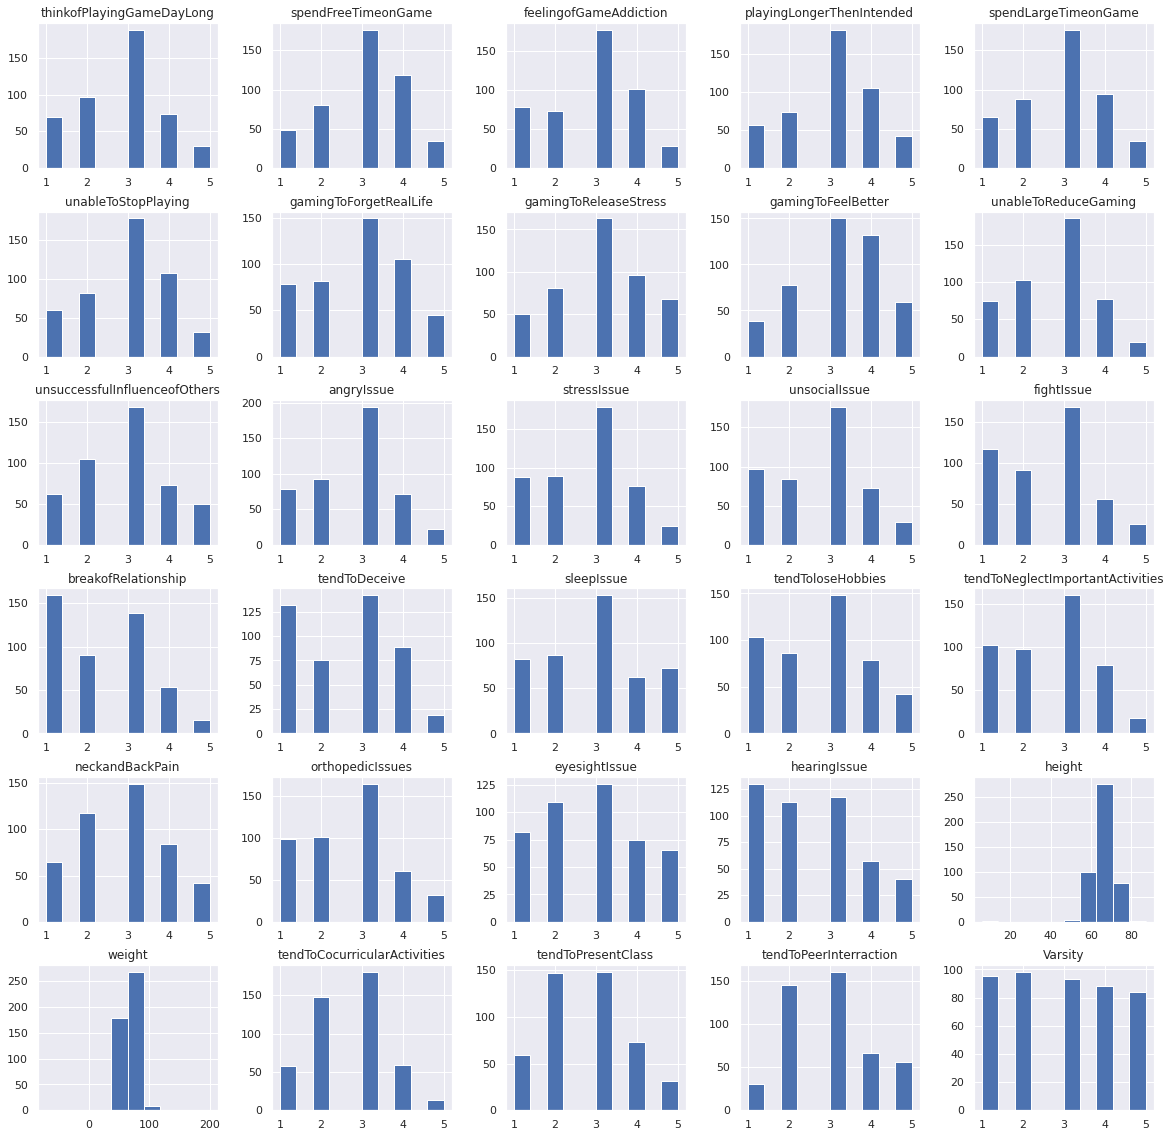

In [12]:
p = df.hist(figsize = (20,20))

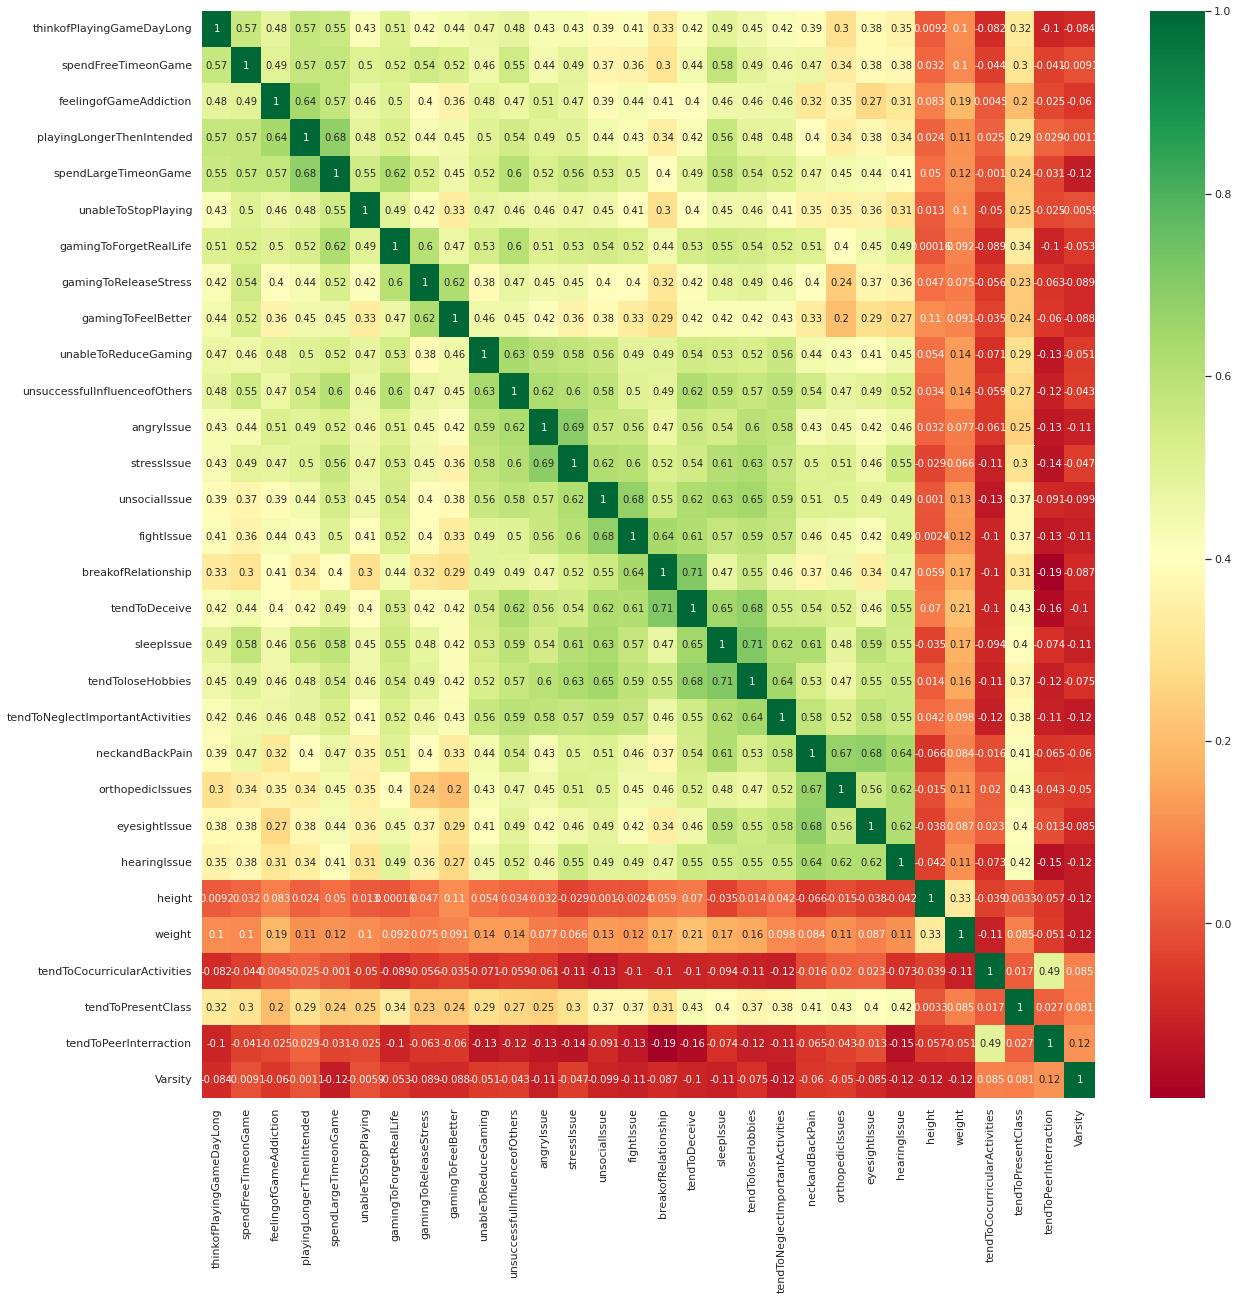

In [13]:
plt.figure(figsize=(20,20))  # on this line I just set the size of figure to 12 by 10.
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  # seaborn has very simple solution for heatmap

In [14]:
#BMI Calculation
df['BMI'] = df["weight"]/(df["height"]*0.0254)**2


#df['BMIStatus'] = df['BMI'].apply(lambda x: 1 if x<18.5 else (2 if 18.5=<x=<24.9 else() ))



df.head()

,thinkofPlayingGameDayLong,spendFreeTimeonGame,feelingofGameAddiction,playingLongerThenIntended,spendLargeTimeonGame,unableToStopPlaying,gamingToForgetRealLife,gamingToReleaseStress,gamingToFeelBetter,unableToReduceGaming,...,eyesightIssue,hearingIssue,height,weight,tendToCocurricularActivities,tendToPresentClass,tendToPeerInterraction,cgpa,Varsity,BMI
0,2,2,2,1,3,2,3,4,1,2,...,4,2,65,50.0,3,3,4,3.00-3.50,1,18.343232
1,3,2,3,2,3,3,2,3,2,2,...,2,2,72,89.0,2,2,2,2.50-3.00,1,26.610779
2,4,4,3,5,4,3,3,3,4,3,...,4,3,61,70.0,2,3,3,3.00-3.50,1,29.158887
3,2,3,3,1,3,3,1,5,4,2,...,2,4,83,79.0,2,3,2,2.50-3.00,1,17.774749
4,3,3,3,3,3,3,3,3,3,3,...,3,3,72,89.0,3,3,3,2.50-3.00,1,26.610779


In [15]:
def BMIStatus(x):
    if (x['BMI'] <18.5):
        return 1
    elif (x['BMI'] >= 18.5 and x['BMI'] <= 24.9):
        return 2
    elif (x['BMI'] >= 25 and x['BMI'] <= 29.9):
        return 3
    elif (x['BMI'] >= 30 and x['BMI'] <= 34.9):
        return 4
    elif (x['BMI'] >= 35):
        return 5
    else:
      return 0
df = df.assign(BMIstatus=df.apply(BMIStatus, axis=1))
df = df.astype({'BMIstatus':'int'})
df.head()

,thinkofPlayingGameDayLong,spendFreeTimeonGame,feelingofGameAddiction,playingLongerThenIntended,spendLargeTimeonGame,unableToStopPlaying,gamingToForgetRealLife,gamingToReleaseStress,gamingToFeelBetter,unableToReduceGaming,...,hearingIssue,height,weight,tendToCocurricularActivities,tendToPresentClass,tendToPeerInterraction,cgpa,Varsity,BMI,BMIstatus
0,2,2,2,1,3,2,3,4,1,2,...,2,65,50.0,3,3,4,3.00-3.50,1,18.343232,1
1,3,2,3,2,3,3,2,3,2,2,...,2,72,89.0,2,2,2,2.50-3.00,1,26.610779,3
2,4,4,3,5,4,3,3,3,4,3,...,3,61,70.0,2,3,3,3.00-3.50,1,29.158887,3
3,2,3,3,1,3,3,1,5,4,2,...,4,83,79.0,2,3,2,2.50-3.00,1,17.774749,1
4,3,3,3,3,3,3,3,3,3,3,...,3,72,89.0,3,3,3,2.50-3.00,1,26.610779,3


In [16]:
#addiction Calculation
df['addictionIndicator']= df.iloc[:,:20].sum(axis=1)
df.loc[:, 'addictionIndicator'] = np.where(df.addictionIndicator>=59, 1, 0)
df.head()
#0=not addict, 1=Addict

,thinkofPlayingGameDayLong,spendFreeTimeonGame,feelingofGameAddiction,playingLongerThenIntended,spendLargeTimeonGame,unableToStopPlaying,gamingToForgetRealLife,gamingToReleaseStress,gamingToFeelBetter,unableToReduceGaming,...,height,weight,tendToCocurricularActivities,tendToPresentClass,tendToPeerInterraction,cgpa,Varsity,BMI,BMIstatus,addictionIndicator
0,2,2,2,1,3,2,3,4,1,2,...,65,50.0,3,3,4,3.00-3.50,1,18.343232,1,0
1,3,2,3,2,3,3,2,3,2,2,...,72,89.0,2,2,2,2.50-3.00,1,26.610779,3,0
2,4,4,3,5,4,3,3,3,4,3,...,61,70.0,2,3,3,3.00-3.50,1,29.158887,3,1
3,2,3,3,1,3,3,1,5,4,2,...,83,79.0,2,3,2,2.50-3.00,1,17.774749,1,0
4,3,3,3,3,3,3,3,3,3,3,...,72,89.0,3,3,3,2.50-3.00,1,26.610779,3,1


In [17]:
#Mental Disorder Calculation
df['mentalDisorder']= df.iloc[:,[0,4,6,7,14,15,16,18]].sum(axis=1)
df.loc[:, 'mentalDisorder'] = np.where(df.mentalDisorder>=29, 1, 0)
df.head()
#0=not Mental, 1=Mental


,thinkofPlayingGameDayLong,spendFreeTimeonGame,feelingofGameAddiction,playingLongerThenIntended,spendLargeTimeonGame,unableToStopPlaying,gamingToForgetRealLife,gamingToReleaseStress,gamingToFeelBetter,unableToReduceGaming,...,weight,tendToCocurricularActivities,tendToPresentClass,tendToPeerInterraction,cgpa,Varsity,BMI,BMIstatus,addictionIndicator,mentalDisorder
0,2,2,2,1,3,2,3,4,1,2,...,50.0,3,3,4,3.00-3.50,1,18.343232,1,0,0
1,3,2,3,2,3,3,2,3,2,2,...,89.0,2,2,2,2.50-3.00,1,26.610779,3,0,0
2,4,4,3,5,4,3,3,3,4,3,...,70.0,2,3,3,3.00-3.50,1,29.158887,3,1,0
3,2,3,3,1,3,3,1,5,4,2,...,79.0,2,3,2,2.50-3.00,1,17.774749,1,0,0
4,3,3,3,3,3,3,3,3,3,3,...,89.0,3,3,3,2.50-3.00,1,26.610779,3,1,0


In [18]:
#physical Disorder Calculation
df['physicalDisorder']= df.iloc[:,[20,21,22,23]].sum(axis=1)
df.loc[:, 'physicalDisorder'] = np.where(df.physicalDisorder>=12, 1, 0)
df.head()
#0=not physical, 1=physical

,thinkofPlayingGameDayLong,spendFreeTimeonGame,feelingofGameAddiction,playingLongerThenIntended,spendLargeTimeonGame,unableToStopPlaying,gamingToForgetRealLife,gamingToReleaseStress,gamingToFeelBetter,unableToReduceGaming,...,tendToCocurricularActivities,tendToPresentClass,tendToPeerInterraction,cgpa,Varsity,BMI,BMIstatus,addictionIndicator,mentalDisorder,physicalDisorder
0,2,2,2,1,3,2,3,4,1,2,...,3,3,4,3.00-3.50,1,18.343232,1,0,0,0
1,3,2,3,2,3,3,2,3,2,2,...,2,2,2,2.50-3.00,1,26.610779,3,0,0,0
2,4,4,3,5,4,3,3,3,4,3,...,2,3,3,3.00-3.50,1,29.158887,3,1,0,1
3,2,3,3,1,3,3,1,5,4,2,...,2,3,2,2.50-3.00,1,17.774749,1,0,0,0
4,3,3,3,3,3,3,3,3,3,3,...,3,3,3,2.50-3.00,1,26.610779,3,1,0,1


In [19]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 458 entries, 0 to 457
Data columns (total 36 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   thinkofPlayingGameDayLong         458 non-null    int64  
 1   spendFreeTimeonGame               458 non-null    int64  
 2   feelingofGameAddiction            458 non-null    int64  
 3   playingLongerThenIntended         458 non-null    int64  
 4   spendLargeTimeonGame              458 non-null    int64  
 5   unableToStopPlaying               458 non-null    int64  
 6   gamingToForgetRealLife            458 non-null    int64  
 7   gamingToReleaseStress             458 non-null    int64  
 8   gamingToFeelBetter                458 non-null    int64  
 9   unableToReduceGaming              458 non-null    int64  
 10  unsuccessfulInfluenceofOthers     458 non-null    int64  
 11  angryIssue                        458 non-null    int64  
 12  stressIs

In [20]:
#how many are addicted
count = df['addictionIndicator'].value_counts()
#relative frequency 
tot_addicted = count[1]
tot_nonaddicted = count[0]
tot_participants = tot_addicted + tot_nonaddicted
print('Total Participants:', tot_participants)
print('Total addicted:', tot_addicted)
print('Total non-addicted:', tot_nonaddicted)
print('Percentage of addicted people: {:.2f}%'.format((tot_addicted / tot_participants) * 100))
print('Percentage of non-addicted people: {:.2f}%'.format((tot_nonaddicted / tot_participants) * 100))
#0=not addict, 1=Addict

Total Participants: 458
Total addicted: 199
Total non-addicted: 259
Percentage of addicted people: 43.45%
Percentage of non-addicted people: 56.55%


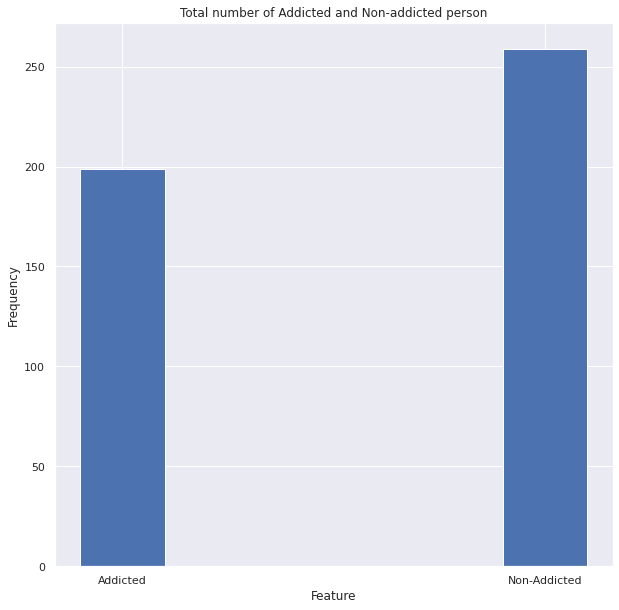

In [21]:
features = ['Addicted', 'Non-Addicted']
values = [tot_addicted, tot_nonaddicted]
plt.figure(figsize=(10, 10))
plt.bar(features, values, width=0.2)
plt.xlabel('Feature')
plt.ylabel('Frequency')
plt.title('Total number of Addicted and Non-addicted person')
plt.show()

In [22]:
#among game addictor how many are having mental disorder
print('People having mental disorder with addiction:', len(df[(df['addictionIndicator']==1) & (df['mentalDisorder']==1)]))

#relative frequency of mental disorder among game addictor
perc_mental_disorder = len(df[(df['addictionIndicator']==1) & (df['mentalDisorder']==1)])/tot_addicted
print('People having mental disorder with addiction (Percentage): {:.2f}%'.format(perc_mental_disorder * 100))

People having mental disorder with addiction: 85
People having mental disorder with addiction (Percentage): 42.71%


In [23]:
#among game addictor how many are having physical disorder
print('People having physical disorder with addiction:', len(df[(df['addictionIndicator']==1) & (df['physicalDisorder']==1)]))

#relative frequency of physical disorder among game addictor
perc_physical_disorder = len(df[(df['addictionIndicator']==1) & (df['physicalDisorder']==1)])/tot_addicted
print('People having physical disorder with addiction (Percentage): {:.2f}%'.format(perc_physical_disorder * 100))

People having physical disorder with addiction: 154
People having physical disorder with addiction (Percentage): 77.39%


In [24]:
idx = 0
stage = []
for ad, md in zip(df['addictionIndicator'], df['mentalDisorder']):
  if ad == 1 and md == 1:
    stage.append(df['thinkofPlayingGameDayLong'][idx])

  idx += 1

print(stage)
print(len(stage))

[4, 3, 4, 5, 5, 5, 4, 4, 4, 5, 3, 4, 4, 4, 4, 4, 4, 4, 5, 4, 5, 5, 3, 5, 4, 3, 3, 5, 1, 4, 4, 4, 3, 4, 3, 4, 3, 3, 5, 4, 4, 4, 5, 4, 5, 5, 5, 4, 3, 3, 3, 4, 5, 4, 3, 4, 3, 4, 4, 3, 3, 4, 3, 3, 3, 4, 4, 3, 5, 3, 4, 4, 3, 3, 4, 5, 5, 4, 4, 4, 5, 2, 3, 5, 4]
85


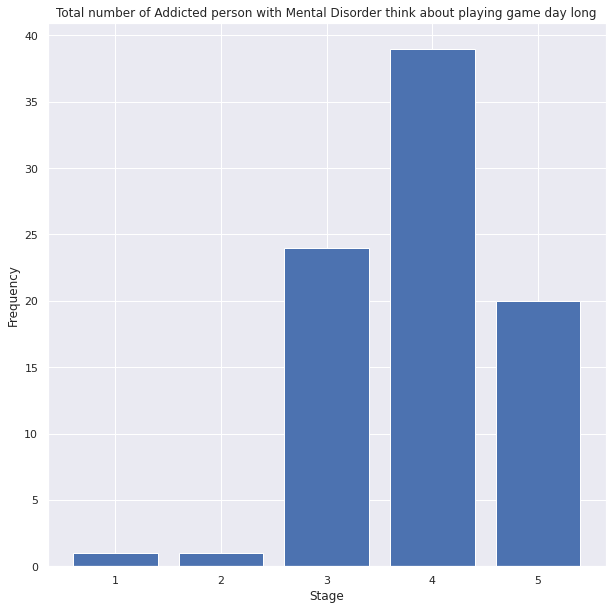

In [25]:
one = two = three= four = five = 0
for val in stage:
  if val == 1: one +=1
  elif val == 2: two += 1
  elif val == 3: three += 1
  elif val == 4: four += 1
  else: five += 1

x_axis = [1, 2, 3, 4, 5]
y_axis = [one, two, three, four, five]

plt.figure(figsize=(10, 10))
plt.bar(x_axis, y_axis)
plt.xlabel('Stage')
plt.ylabel('Frequency')
plt.title('Total number of Addicted person with Mental Disorder think about playing game day long')
plt.show()

In [26]:
#percentage
print('Stage: Thinking of playing game all day long')
print('-'*30)
print('Never: {:.2f}%'.format((one/85)*100))
print('Rarely: {:.2f}%'.format((two/85)*100))
print('Sometimes: {:.2f}%'.format((three/85)*100))
print('Often: {:.2f}%'.format((four/85)*100))
print('Very Often: {:.2f}%'.format((five/85)*100))

Stage: Thinking of playing game all day long
------------------------------
Never: 1.18%
Rarely: 1.18%
Sometimes: 28.24%
Often: 45.88%
Very Often: 23.53%


In [27]:
#relationship between addiction and thinking day long 
from scipy.stats import ttest_ind
addiction_mean = np.mean(np.array(df['addictionIndicator'].values.tolist()))
daylong_mean = np.mean(np.array(df['thinkofPlayingGameDayLong'].values.tolist()))
print("addiction mean value:",addiction_mean)
print("daylong thinking about playing game mean value:",daylong_mean)
addiction_std = np.std(np.array(df['addictionIndicator'].values.tolist()))
daylong_std = np.std(np.array(df['thinkofPlayingGameDayLong'].values.tolist()))
print("addiction std value:",addiction_std)
print("daylong thinking about playing game std value:",daylong_std)
ttest,pval = ttest_ind(np.array(df['addictionIndicator'].values.tolist()),np.array(df['thinkofPlayingGameDayLong'].values.tolist()))
print('t-test',ttest)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

addiction mean value: 0.4344978165938865
daylong thinking about playing game mean value: 2.7794759825327513
addiction std value: 0.49569089558820006
daylong thinking about playing game std value: 1.0905780229289652
t-test -41.84661925130569
p-value 1.2903086224879465e-214
we reject null hypothesis


In [28]:
idx = 0
stage = []
for ad, md in zip(df['addictionIndicator'], df['mentalDisorder']):
  if ad == 1 and md == 1:
    stage.append(df['gamingToForgetRealLife'][idx])

  idx += 1

print(stage)
print(len(stage))

[4, 3, 3, 4, 4, 4, 4, 5, 5, 3, 3, 4, 5, 4, 5, 5, 5, 4, 4, 5, 5, 5, 3, 3, 5, 3, 4, 5, 4, 4, 4, 3, 3, 4, 5, 5, 4, 4, 5, 4, 4, 5, 5, 4, 5, 5, 5, 5, 5, 4, 4, 4, 5, 4, 3, 4, 5, 4, 5, 4, 4, 4, 4, 4, 3, 4, 5, 5, 5, 3, 3, 5, 4, 4, 3, 5, 4, 4, 5, 5, 5, 3, 5, 4, 3]
85


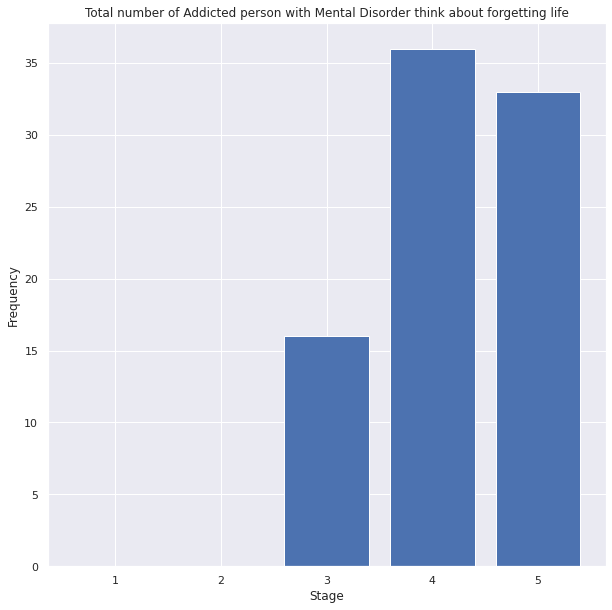

In [29]:
one = two = three= four = five = 0
for val in stage:
  if val == 1: one +=1
  elif val == 2: two += 1
  elif val == 3: three += 1
  elif val == 4: four += 1
  else: five += 1

x_axis = [1, 2, 3, 4, 5]
y_axis = [one, two, three, four, five]

plt.figure(figsize=(10, 10))
plt.bar(x_axis, y_axis)
plt.xlabel('Stage')
plt.ylabel('Frequency')
plt.title('Total number of Addicted person with Mental Disorder think about forgetting life')
plt.show()

In [30]:
#percentage
print('Stage: Thinking about forgetting life')
print('-'*30)
print('Never: {:.2f}%'.format((one/85)*100))
print('Rarely: {:.2f}%'.format((two/85)*100))
print('Sometimes: {:.2f}%'.format((three/85)*100))
print('Often: {:.2f}%'.format((four/85)*100))
print('Very Often: {:.2f}%'.format((five/85)*100))

Stage: Thinking about forgetting life
------------------------------
Never: 0.00%
Rarely: 0.00%
Sometimes: 18.82%
Often: 42.35%
Very Often: 38.82%


In [31]:
#relationship between addiction and forget life concept
from scipy.stats import ttest_ind
addiction_mean = np.mean(np.array(df['addictionIndicator'].values.tolist()))
forgetlife_mean = np.mean(np.array(df['gamingToForgetRealLife'].values.tolist()))
print("addiction mean value:",addiction_mean)
print("playing game to forget life mean value:",forgetlife_mean)
addiction_std = np.std(np.array(df['addictionIndicator'].values.tolist()))
forgetlife_std = np.std(np.array(df['gamingToForgetRealLife'].values.tolist()))
print("addiction std value:",addiction_std)
print("playing game to forget life std value:",forgetlife_std)
ttest,pval = ttest_ind(np.array(df['addictionIndicator'].values.tolist()),np.array(df['gamingToForgetRealLife'].values.tolist()))
print('t-test',ttest)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

addiction mean value: 0.4344978165938865
playing game to forget life mean value: 2.908296943231441
addiction std value: 0.49569089558820006
playing game to forget life std value: 1.2132353004909924
t-test -40.351090500138426
p-value 3.080241619552916e-205
we reject null hypothesis


In [32]:
idx = 0
stage = []
for ad, md in zip(df['addictionIndicator'], df['mentalDisorder']):
  if ad == 1 and md == 1:
    stage.append(df['gamingToReleaseStress'][idx])

  idx += 1

print(stage)
print(len(stage))

[3, 3, 4, 5, 3, 4, 5, 5, 3, 5, 3, 4, 5, 4, 5, 5, 5, 5, 5, 5, 5, 5, 3, 4, 5, 4, 4, 5, 3, 4, 4, 4, 4, 5, 5, 5, 4, 5, 5, 4, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 5, 5, 5, 4, 5, 3, 3, 4, 4, 4, 5, 4, 4, 4, 5, 3, 5, 5, 5, 3, 3, 5, 3, 3, 4, 5, 4, 4, 4, 5, 5, 4, 4, 1, 4]
85


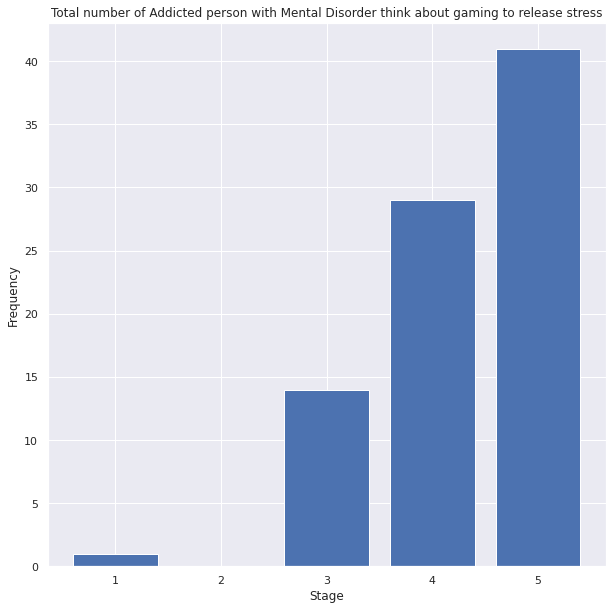

In [33]:
one = two = three= four = five = 0
for val in stage:
  if val == 1: one +=1
  elif val == 2: two += 1
  elif val == 3: three += 1
  elif val == 4: four += 1
  else: five += 1

x_axis = [1, 2, 3, 4, 5]
y_axis = [one, two, three, four, five]

plt.figure(figsize=(10, 10))
plt.bar(x_axis, y_axis)
plt.xlabel('Stage')
plt.ylabel('Frequency')
plt.title('Total number of Addicted person with Mental Disorder think about gaming to release stress')
plt.show()

In [34]:
#percentage
print('Stage: Thinking about gaming to release stress')
print('-'*30)
print('Never: {:.2f}%'.format((one/85)*100))
print('Rarely: {:.2f}%'.format((two/85)*100))
print('Sometimes: {:.2f}%'.format((three/85)*100))
print('Often: {:.2f}%'.format((four/85)*100))
print('Very Often: {:.2f}%'.format((five/85)*100))

Stage: Thinking about gaming to release stress
------------------------------
Never: 1.18%
Rarely: 0.00%
Sometimes: 16.47%
Often: 34.12%
Very Often: 48.24%


In [35]:
#relationship between addiction and release stress
from scipy.stats import ttest_ind
addiction_mean = np.mean(np.array(df['addictionIndicator'].values.tolist()))
rstress_meam = np.mean(np.array(df['gamingToReleaseStress'].values.tolist()))
print("addiction mean value:",addiction_mean)
print("playing game to release stress mean value:",rstress_meam)
addiction_std = np.std(np.array(df['addictionIndicator'].values.tolist()))
rstress_std = np.std(np.array(df['gamingToReleaseStress'].values.tolist()))
print("addiction std value:",addiction_std)
print("playing game to release stress std value:",rstress_std)
ttest,pval = ttest_ind(np.array(df['addictionIndicator'].values.tolist()),np.array(df['gamingToReleaseStress'].values.tolist()))
print('t-test',ttest)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

addiction mean value: 0.4344978165938865
playing game to release stress mean value: 3.111353711790393
addiction std value: 0.49569089558820006
playing game to release stress std value: 1.1851712612766527
t-test -44.54472979611329
p-value 2.890002889112066e-231
we reject null hypothesis


In [36]:
idx = 0
stage = []
for ad, md in zip(df['addictionIndicator'], df['mentalDisorder']):
  if ad == 1 and md == 1:
    stage.append(df['angryIssue'][idx])

  idx += 1

print(stage)
print(len(stage))

[5, 3, 4, 5, 5, 3, 3, 5, 4, 3, 5, 4, 3, 5, 5, 4, 4, 4, 5, 4, 5, 3, 4, 3, 4, 4, 3, 4, 5, 4, 4, 3, 3, 4, 3, 3, 4, 3, 5, 3, 3, 3, 4, 3, 4, 3, 4, 4, 3, 3, 4, 4, 5, 4, 4, 4, 4, 5, 3, 4, 4, 4, 4, 3, 3, 4, 4, 3, 4, 3, 3, 5, 3, 3, 3, 5, 3, 3, 3, 3, 4, 4, 4, 4, 4]
85


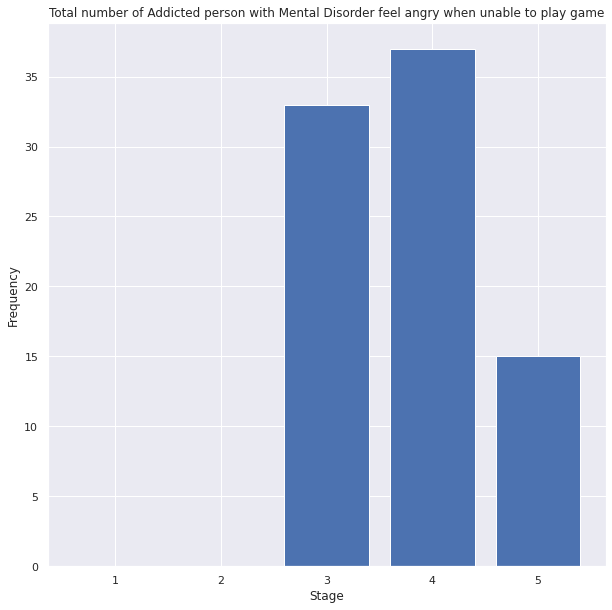

In [37]:
one = two = three= four = five = 0
for val in stage:
  if val == 1: one +=1
  elif val == 2: two += 1
  elif val == 3: three += 1
  elif val == 4: four += 1
  else: five += 1

x_axis = [1, 2, 3, 4, 5]
y_axis = [one, two, three, four, five]

plt.figure(figsize=(10, 10))
plt.bar(x_axis, y_axis)
plt.xlabel('Stage')
plt.ylabel('Frequency')
plt.title('Total number of Addicted person with Mental Disorder feel angry when unable to play game')
plt.show()

In [38]:
#percentage
print('Stage: feel angry when unable to play game')
print('-'*30)
print('Never: {:.2f}%'.format((one/85)*100))
print('Rarely: {:.2f}%'.format((two/85)*100))
print('Sometimes: {:.2f}%'.format((three/85)*100))
print('Often: {:.2f}%'.format((four/85)*100))
print('Very Often: {:.2f}%'.format((five/85)*100))

Stage: feel angry when unable to play game
------------------------------
Never: 0.00%
Rarely: 0.00%
Sometimes: 38.82%
Often: 43.53%
Very Often: 17.65%


In [39]:
#relationship between addiction and agression
from scipy.stats import ttest_ind
addiction_mean = np.mean(np.array(df['addictionIndicator'].values.tolist()))
agression_meam = np.mean(np.array(df['angryIssue'].values.tolist()))
print("addiction mean value:",addiction_mean)
print("agression mean value:",agression_meam)
addiction_std = np.std(np.array(df['addictionIndicator'].values.tolist()))
agression_std = np.std(np.array(df['angryIssue'].values.tolist()))
print("addiction std value:",addiction_std)
print("agression std value:",agression_std)
ttest,pval = ttest_ind(np.array(df['addictionIndicator'].values.tolist()),np.array(df['angryIssue'].values.tolist()))
print('t-test',ttest)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")


addiction mean value: 0.4344978165938865
agression mean value: 2.7052401746724892
addiction std value: 0.49569089558820006
agression std value: 1.0728969716372776
t-test -41.072973684765486
p-value 8.896146000434733e-210
we reject null hypothesis


In [40]:
idx = 0
stage = []
for ad, md in zip(df['addictionIndicator'], df['mentalDisorder']):
  if ad == 1 and md == 1:
    stage.append(df['unsocialIssue'][idx])

  idx += 1

print(stage)
print(len(stage))

[5, 4, 3, 4, 5, 4, 5, 4, 4, 5, 5, 4, 3, 4, 4, 5, 5, 4, 4, 4, 5, 3, 5, 4, 3, 4, 4, 2, 3, 4, 4, 4, 3, 5, 4, 4, 3, 4, 4, 3, 3, 4, 3, 3, 4, 3, 5, 5, 3, 3, 4, 5, 3, 3, 3, 5, 4, 3, 3, 4, 5, 4, 4, 4, 3, 5, 3, 4, 4, 3, 5, 5, 4, 3, 4, 5, 3, 3, 3, 4, 3, 4, 4, 5, 3]
85


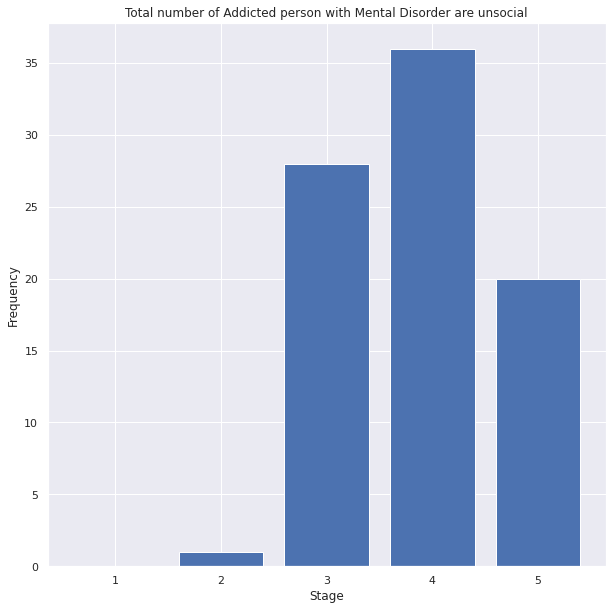

In [41]:
one = two = three= four = five = 0
for val in stage:
  if val == 1: one +=1
  elif val == 2: two += 1
  elif val == 3: three += 1
  elif val == 4: four += 1
  else: five += 1

x_axis = [1, 2, 3, 4, 5]
y_axis = [one, two, three, four, five]

plt.figure(figsize=(10, 10))
plt.bar(x_axis, y_axis)
plt.xlabel('Stage')
plt.ylabel('Frequency')
plt.title('Total number of Addicted person with Mental Disorder are unsocial')
plt.show()

In [42]:
#percentage
print('Stage: Who are unsocial')
print('-'*30)
print('Never: {:.2f}%'.format((one/85)*100))
print('Rarely: {:.2f}%'.format((two/85)*100))
print('Sometimes: {:.2f}%'.format((three/85)*100))
print('Often: {:.2f}%'.format((four/85)*100))
print('Very Often: {:.2f}%'.format((five/85)*100))

Stage: Who are unsocial
------------------------------
Never: 0.00%
Rarely: 1.18%
Sometimes: 32.94%
Often: 42.35%
Very Often: 23.53%


In [43]:
#relationship between addiction and unsocial
from scipy.stats import ttest_ind
addiction_mean = np.mean(np.array(df['addictionIndicator'].values.tolist()))
unsocial_mean = np.mean(np.array(df['unsocialIssue'].values.tolist()))
print("addiction mean value:",addiction_mean)
print("unsocial mean value:",unsocial_mean)
addiction_std = np.std(np.array(df['addictionIndicator'].values.tolist()))
unsocial_std = np.std(np.array(df['unsocialIssue'].values.tolist()))
print("addiction std value:",addiction_std)
print("unsocial std value:",unsocial_std)
ttest,pval = ttest_ind(np.array(df['addictionIndicator'].values.tolist()),np.array(df['unsocialIssue'].values.tolist()))
print('t-test',ttest)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

addiction mean value: 0.4344978165938865
unsocial mean value: 2.6768558951965065
addiction std value: 0.49569089558820006
unsocial std value: 1.156125392189466
t-test -38.107792815347764
p-value 5.465582709427789e-191
we reject null hypothesis


In [44]:
idx = 0
stage = []
for ad, md in zip(df['addictionIndicator'], df['mentalDisorder']):
  if ad == 1 and md == 1:
    stage.append(df['breakofRelationship'][idx])

  idx += 1

print(stage)
print(len(stage))

[4, 4, 5, 4, 5, 4, 2, 4, 5, 3, 4, 4, 3, 5, 4, 5, 5, 4, 4, 3, 5, 3, 5, 3, 2, 3, 3, 1, 4, 4, 4, 4, 3, 2, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 3, 2, 3, 2, 4, 2, 3, 3, 5, 3, 3, 5, 4, 4, 3, 4, 4, 4, 3, 4, 3, 3, 3, 5, 2, 3, 3, 3, 4, 5, 2, 3, 3, 3, 3, 5, 4, 5, 4]
85


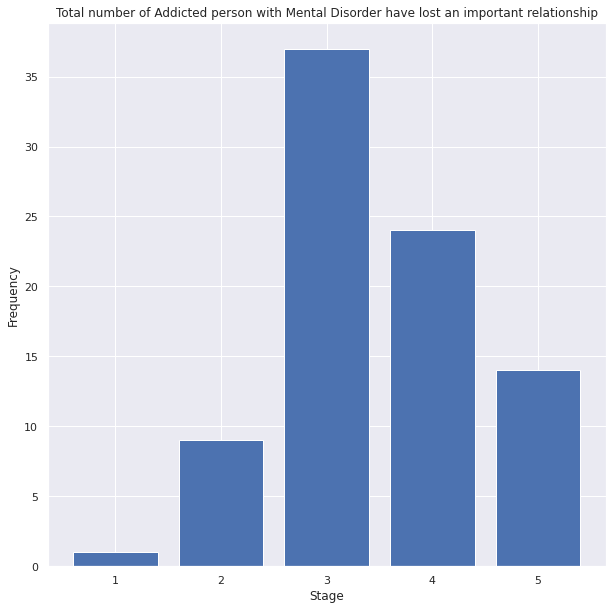

In [45]:
one = two = three= four = five = 0
for val in stage:
  if val == 1: one +=1
  elif val == 2: two += 1
  elif val == 3: three += 1
  elif val == 4: four += 1
  else: five += 1

x_axis = [1, 2, 3, 4, 5]
y_axis = [one, two, three, four, five]

plt.figure(figsize=(10, 10))
plt.bar(x_axis, y_axis)
plt.xlabel('Stage')
plt.ylabel('Frequency')
plt.title('Total number of Addicted person with Mental Disorder have lost an important relationship')
plt.show()

In [46]:
#percentage
print('Stage: Lost important relationship')
print('-'*30)
print('Never: {:.2f}%'.format((one/85)*100))
print('Rarely: {:.2f}%'.format((two/85)*100))
print('Sometimes: {:.2f}%'.format((three/85)*100))
print('Often: {:.2f}%'.format((four/85)*100))
print('Very Often: {:.2f}%'.format((five/85)*100))

Stage: Lost important relationship
------------------------------
Never: 1.18%
Rarely: 10.59%
Sometimes: 43.53%
Often: 28.24%
Very Often: 16.47%


In [47]:
#relationship between addiction and breakup
from scipy.stats import ttest_ind
addiction_mean = np.mean(np.array(df['addictionIndicator'].values.tolist()))
brkup_mean = np.mean(np.array(df['breakofRelationship'].values.tolist()))
print("addiction mean value:",addiction_mean)
print("breakup mean value:",brkup_mean)
addiction_std = np.std(np.array(df['addictionIndicator'].values.tolist()))
brkup_std = np.std(np.array(df['breakofRelationship'].values.tolist()))
print("addiction std value:",addiction_std)
print("breakup std value:",brkup_std)
ttest,pval = ttest_ind(np.array(df['addictionIndicator'].values.tolist()),np.array(df['breakofRelationship'].values.tolist()))
print('t-test',ttest)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

addiction mean value: 0.4344978165938865
breakup mean value: 2.296943231441048
addiction std value: 0.49569089558820006
breakup std value: 1.161251884824637
t-test -31.533207789797228
p-value 2.8501880394903764e-148
we reject null hypothesis


In [48]:
idx = 0
stage = []
for ad, md in zip(df['addictionIndicator'], df['mentalDisorder']):
  if ad == 1 and md == 1:
    stage.append(df['sleepIssue'][idx])

  idx += 1

print(stage)
print(len(stage))

[4, 5, 4, 5, 4, 4, 5, 5, 5, 5, 3, 4, 4, 4, 3, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 4, 4, 3, 4, 4, 4, 3, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 4, 5, 5, 5, 5, 5, 5, 4, 5, 5, 4, 3, 4, 5, 3, 5, 3, 5, 4, 4, 4, 4, 3, 5, 5, 5, 4, 5, 3, 3, 3, 3, 5, 3, 5, 5, 5, 5, 5, 3, 5, 4]
85


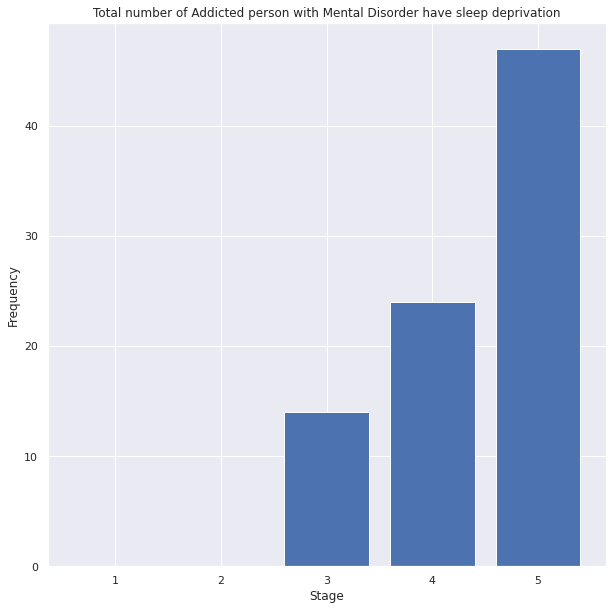

In [49]:
one = two = three= four = five = 0
for val in stage:
  if val == 1: one +=1
  elif val == 2: two += 1
  elif val == 3: three += 1
  elif val == 4: four += 1
  else: five += 1

x_axis = [1, 2, 3, 4, 5]
y_axis = [one, two, three, four, five]

plt.figure(figsize=(10, 10))
plt.bar(x_axis, y_axis)
plt.xlabel('Stage')
plt.ylabel('Frequency')
plt.title('Total number of Addicted person with Mental Disorder have sleep deprivation')
plt.show()

In [50]:
#percentage
print('Stage: Sleep deprivation')
print('-'*30)
print('Never: {:.2f}%'.format((one/85)*100))
print('Rarely: {:.2f}%'.format((two/85)*100))
print('Sometimes: {:.2f}%'.format((three/85)*100))
print('Often: {:.2f}%'.format((four/85)*100))
print('Very Often: {:.2f}%'.format((five/85)*100))

Stage: Sleep deprivation
------------------------------
Never: 0.00%
Rarely: 0.00%
Sometimes: 16.47%
Often: 28.24%
Very Often: 55.29%


In [51]:
#relationship between addiction and sleepderivation
from scipy.stats import ttest_ind
addiction_mean = np.mean(np.array(df['addictionIndicator'].values.tolist()))
sleepIssue_mean = np.mean(np.array(df['sleepIssue'].values.tolist()))
print("addiction mean value:",addiction_mean)
print("sleepIssue mean value:",sleepIssue_mean)
addiction_std = np.std(np.array(df['addictionIndicator'].values.tolist()))
sleepIssue_std = np.std(np.array(df['sleepIssue'].values.tolist()))
print("addiction std value:",addiction_std)
print("sleepIssue std value:",sleepIssue_std)
ttest,pval = ttest_ind(np.array(df['addictionIndicator'].values.tolist()),np.array(df['sleepIssue'].values.tolist()))
print('t-test',ttest)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")


addiction mean value: 0.4344978165938865
sleepIssue mean value: 2.908296943231441
addiction std value: 0.49569089558820006
sleepIssue std value: 1.2933728220443181
t-test -38.18027555567946
p-value 1.8795369110441046e-191
we reject null hypothesis


In [52]:
idx = 0
stage = []
for ad, md in zip(df['addictionIndicator'], df['physicalDisorder']):
  if ad == 1 and md == 1:
    stage.append(df['neckandBackPain'][idx])

  idx += 1

print(stage)
print(len(stage))

[4, 3, 5, 5, 3, 4, 4, 4, 3, 3, 5, 4, 3, 4, 5, 3, 3, 4, 4, 3, 4, 4, 4, 3, 3, 5, 3, 5, 3, 3, 4, 4, 4, 4, 3, 3, 4, 3, 3, 5, 5, 3, 4, 3, 4, 4, 4, 4, 3, 3, 4, 5, 4, 3, 3, 5, 4, 3, 2, 5, 4, 4, 4, 3, 4, 4, 4, 4, 4, 5, 4, 4, 4, 4, 5, 3, 4, 5, 4, 4, 5, 4, 3, 4, 5, 4, 3, 3, 3, 3, 5, 5, 4, 4, 3, 3, 4, 3, 4, 4, 4, 4, 4, 5, 4, 3, 3, 4, 5, 3, 3, 3, 5, 4, 3, 5, 5, 5, 4, 3, 2, 3, 2, 3, 3, 3, 3, 5, 4, 5, 4, 3, 3, 4, 3, 4, 5, 5, 2, 4, 4, 2, 4, 2, 5, 5, 5, 5, 4, 4, 3, 3, 4, 5]
154


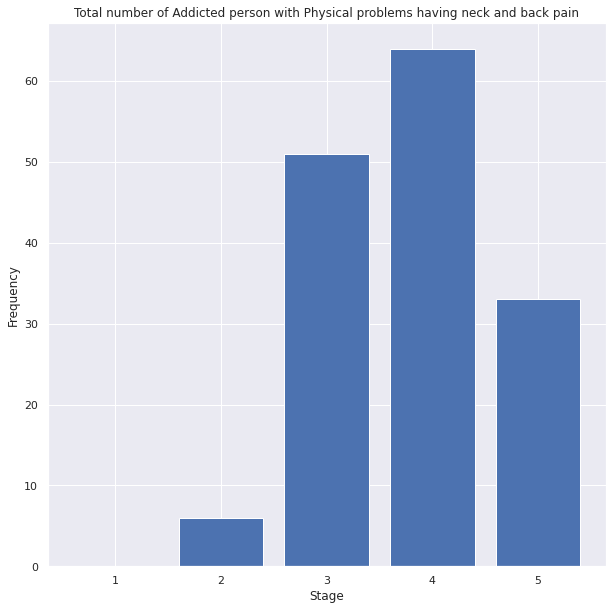

In [53]:
one = two = three= four = five = 0
for val in stage:
  if val == 1: one +=1
  elif val == 2: two += 1
  elif val == 3: three += 1
  elif val == 4: four += 1
  else: five += 1

x_axis = [1, 2, 3, 4, 5]
y_axis = [one, two, three, four, five]

plt.figure(figsize=(10, 10))
plt.bar(x_axis, y_axis)
plt.xlabel('Stage')
plt.ylabel('Frequency')
plt.title('Total number of Addicted person with Physical problems having neck and back pain')
plt.show()

In [54]:
#percentage
print('Stage: Neck and back pain')
print('-'*30)
print('Never: {:.2f}%'.format((one/154)*100))
print('Rarely: {:.2f}%'.format((two/154)*100))
print('Sometimes: {:.2f}%'.format((three/154)*100))
print('Often: {:.2f}%'.format((four/154)*100))
print('Very Often: {:.2f}%'.format((five/154)*100))

Stage: Neck and back pain
------------------------------
Never: 0.00%
Rarely: 3.90%
Sometimes: 33.12%
Often: 41.56%
Very Often: 21.43%


In [55]:
#relationship between addiction and neck-back pain
from scipy.stats import ttest_ind
addiction_mean = np.mean(np.array(df['addictionIndicator'].values.tolist()))
neckandBackPain_mean = np.mean(np.array(df['neckandBackPain'].values.tolist()))
print("addiction mean value:",addiction_mean)
print("neck and Back Pain mean value:",neckandBackPain_mean)
addiction_std = np.std(np.array(df['addictionIndicator'].values.tolist()))
neckandBackPain_std = np.std(np.array(df['neckandBackPain'].values.tolist()))
print("addiction std value:",addiction_std)
print("neck and Back Pain std value:",neckandBackPain_std)
ttest,pval = ttest_ind(np.array(df['addictionIndicator'].values.tolist()),np.array(df['neckandBackPain'].values.tolist()))
print('t-test',ttest)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

addiction mean value: 0.4344978165938865
neck and Back Pain mean value: 2.8253275109170306
addiction std value: 0.49569089558820006
neck and Back Pain std value: 1.1597566007942979
t-test -40.523456318729366
p-value 2.5268984210041887e-206
we reject null hypothesis


In [56]:
idx = 0
stage = []
for ad, md in zip(df['addictionIndicator'], df['physicalDisorder']):
  if ad == 1 and md == 1:
    stage.append(df['orthopedicIssues'][idx])

  idx += 1

print(stage)
print(len(stage))

[3, 3, 4, 5, 3, 4, 3, 5, 2, 3, 3, 5, 4, 5, 3, 3, 3, 5, 4, 3, 4, 4, 3, 3, 3, 5, 3, 5, 4, 3, 4, 4, 4, 4, 3, 3, 3, 3, 3, 4, 4, 3, 3, 3, 4, 3, 3, 3, 3, 3, 4, 4, 4, 3, 3, 4, 5, 3, 5, 5, 4, 3, 3, 4, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 4, 3, 3, 3, 3, 4, 3, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 4, 5, 5, 4, 5, 4, 4, 4, 4, 3, 4, 4, 3, 3, 5, 4, 3, 3, 4, 5, 3, 4, 3, 2, 3, 4, 3, 2, 3, 3, 3, 3, 4, 3, 5, 3, 4, 3, 3, 4, 4, 4, 4, 5, 4, 3, 4, 4, 4, 3, 3, 3, 4, 4, 5, 5, 4, 3, 2, 4, 5]
154


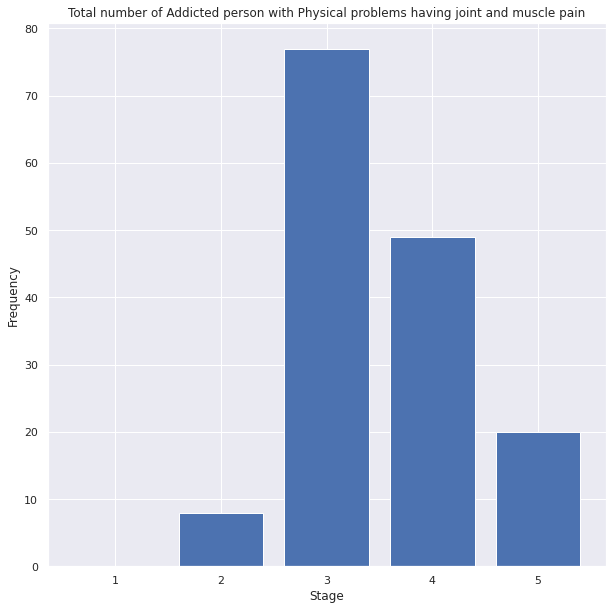

In [57]:
one = two = three= four = five = 0
for val in stage:
  if val == 1: one +=1
  elif val == 2: two += 1
  elif val == 3: three += 1
  elif val == 4: four += 1
  else: five += 1

x_axis = [1, 2, 3, 4, 5]
y_axis = [one, two, three, four, five]

plt.figure(figsize=(10, 10))
plt.bar(x_axis, y_axis)
plt.xlabel('Stage')
plt.ylabel('Frequency')
plt.title('Total number of Addicted person with Physical problems having joint and muscle pain')
plt.show()

In [58]:
#percentage
print('Stage- Having joint and muscle pain')
print('-'*30)
print('Never: {:.2f}%'.format((one/154)*100))
print('Rarely: {:.2f}%'.format((two/154)*100))
print('Sometimes: {:.2f}%'.format((three/154)*100))
print('Often: {:.2f}%'.format((four/154)*100))
print('Very Often: {:.2f}%'.format((five/154)*100))

Stage- Having joint and muscle pain
------------------------------
Never: 0.00%
Rarely: 5.19%
Sometimes: 50.00%
Often: 31.82%
Very Often: 12.99%


In [59]:
#relationship between addiction and joint-muscle pain
from scipy.stats import ttest_ind
addiction_mean = np.mean(np.array(df['addictionIndicator'].values.tolist()))
orthopedicIssues_mean = np.mean(np.array(df['orthopedicIssues'].values.tolist()))
print("addiction mean value:",addiction_mean)
print("orthopedic Issues mean value:",orthopedicIssues_mean)
addiction_std = np.std(np.array(df['addictionIndicator'].values.tolist()))
orthopedicIssues_std = np.std(np.array(df['orthopedicIssues'].values.tolist()))
print("addiction std value:",addiction_std)
print("orthopedic Issues std value:",orthopedicIssues_std)
ttest,pval = ttest_ind(np.array(df['addictionIndicator'].values.tolist()),np.array(df['orthopedicIssues'].values.tolist()))
print('t-test',ttest)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

addiction mean value: 0.4344978165938865
orthopedic Issues mean value: 2.6200873362445414
addiction std value: 0.49569089558820006
orthopedic Issues std value: 1.1633928664920954
t-test -36.94675812288953
p-value 1.5491986524624592e-183
we reject null hypothesis


In [60]:
idx = 0
stage = []
for ad, md in zip(df['addictionIndicator'], df['physicalDisorder']):
  if ad == 1 and md == 1:
    stage.append(df['eyesightIssue'][idx])

  idx += 1

print(stage)
print(len(stage))

[4, 3, 5, 5, 4, 4, 4, 5, 4, 3, 5, 4, 3, 5, 5, 3, 3, 5, 4, 3, 4, 3, 4, 3, 3, 5, 4, 5, 4, 3, 5, 4, 4, 5, 3, 3, 4, 4, 3, 5, 5, 3, 5, 3, 5, 5, 5, 5, 3, 3, 4, 5, 4, 3, 3, 4, 3, 4, 4, 3, 4, 3, 2, 2, 5, 4, 5, 4, 5, 5, 4, 4, 3, 5, 5, 5, 4, 4, 4, 5, 5, 5, 3, 5, 5, 5, 3, 3, 3, 3, 5, 5, 4, 4, 4, 4, 3, 4, 3, 3, 3, 3, 4, 5, 3, 3, 5, 3, 4, 4, 3, 4, 3, 3, 4, 5, 5, 5, 4, 3, 4, 3, 4, 4, 3, 4, 4, 4, 5, 5, 5, 3, 3, 3, 3, 4, 5, 5, 4, 5, 5, 4, 4, 4, 5, 5, 3, 5, 5, 1, 2, 3, 2, 3]
154


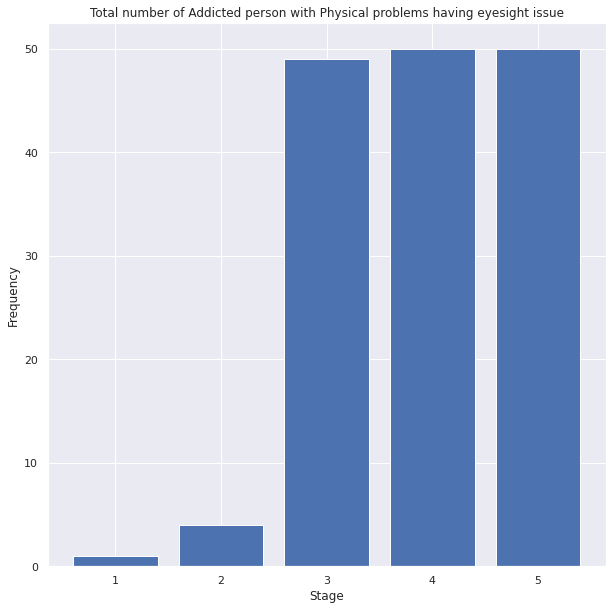

In [61]:
one = two = three= four = five = 0
for val in stage:
  if val == 1: one +=1
  elif val == 2: two += 1
  elif val == 3: three += 1
  elif val == 4: four += 1
  else: five += 1

x_axis = [1, 2, 3, 4, 5]
y_axis = [one, two, three, four, five]

plt.figure(figsize=(10, 10))
plt.bar(x_axis, y_axis)
plt.xlabel('Stage')
plt.ylabel('Frequency')
plt.title('Total number of Addicted person with Physical problems having eyesight issue')
plt.show()

In [62]:
#percentage
print('Stage- Eyesight problem')
print('-'*30)
print('Never: {:.2f}%'.format((one/154)*100))
print('Rarely: {:.2f}%'.format((two/154)*100))
print('Sometimes: {:.2f}%'.format((three/154)*100))
print('Often: {:.2f}%'.format((four/154)*100))
print('Very Often: {:.2f}%'.format((five/154)*100))

Stage- Eyesight problem
------------------------------
Never: 0.65%
Rarely: 2.60%
Sometimes: 31.82%
Often: 32.47%
Very Often: 32.47%


In [63]:
#relationship between addiction and eyesight
from scipy.stats import ttest_ind
addiction_mean = np.mean(np.array(df['addictionIndicator'].values.tolist()))
eyesight_mean = np.mean(np.array(df['eyesightIssue'].values.tolist()))
print("addiction mean value:",addiction_mean)
print("eyesight mean value:",eyesight_mean)
addiction_std = np.std(np.array(df['addictionIndicator'].values.tolist()))
eyesight_std = np.std(np.array(df['eyesightIssue'].values.tolist()))
print("addiction std value:",addiction_std)
print("eyesight std value:",eyesight_std)
ttest,pval = ttest_ind(np.array(df['addictionIndicator'].values.tolist()),np.array(df['eyesightIssue'].values.tolist()))
print('t-test',ttest)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

addiction mean value: 0.4344978165938865
eyesight mean value: 2.8558951965065504
addiction std value: 0.49569089558820006
eyesight std value: 1.293660291465622
t-test -37.364272992126956
p-value 3.1951780086419923e-186
we reject null hypothesis


In [64]:
idx = 0
stage = []
for ad, md in zip(df['addictionIndicator'], df['physicalDisorder']):
  if ad == 1 and md == 1:
    stage.append(df['hearingIssue'][idx])

  idx += 1

print(stage)
print(len(stage))

[3, 3, 4, 3, 4, 5, 3, 4, 4, 3, 2, 5, 4, 4, 5, 3, 3, 5, 1, 3, 5, 4, 4, 3, 3, 4, 4, 4, 5, 3, 5, 5, 5, 5, 3, 3, 3, 3, 3, 5, 5, 3, 4, 3, 3, 4, 5, 4, 3, 3, 2, 3, 2, 3, 3, 3, 4, 2, 5, 2, 4, 3, 3, 3, 4, 4, 4, 4, 4, 5, 3, 3, 3, 4, 4, 4, 3, 5, 4, 5, 4, 4, 4, 5, 5, 5, 3, 3, 3, 3, 5, 5, 5, 4, 4, 3, 4, 3, 3, 3, 3, 4, 4, 5, 3, 3, 3, 2, 3, 3, 3, 3, 4, 4, 3, 5, 4, 4, 1, 3, 4, 4, 4, 4, 3, 4, 3, 2, 1, 5, 2, 3, 2, 4, 4, 4, 5, 2, 4, 4, 5, 3, 3, 4, 5, 5, 2, 5, 1, 3, 5, 4, 2, 5]
154


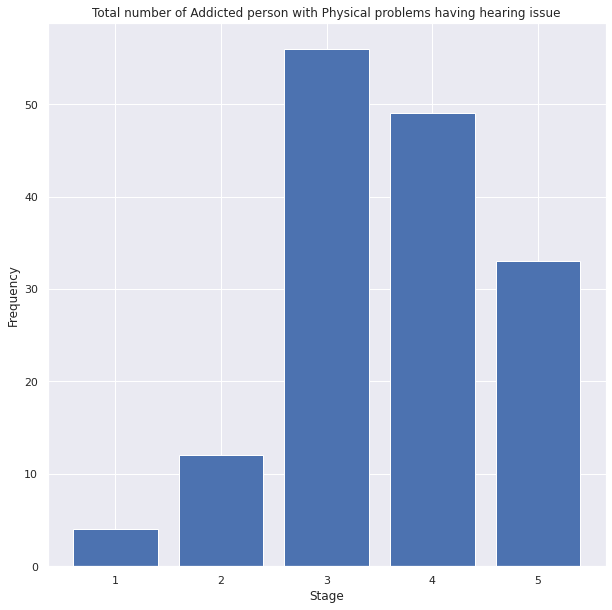

In [65]:
one = two = three= four = five = 0
for val in stage:
  if val == 1: one +=1
  elif val == 2: two += 1
  elif val == 3: three += 1
  elif val == 4: four += 1
  else: five += 1

x_axis = [1, 2, 3, 4, 5]
y_axis = [one, two, three, four, five]

plt.figure(figsize=(10, 10))
plt.bar(x_axis, y_axis)
plt.xlabel('Stage')
plt.ylabel('Frequency')
plt.title('Total number of Addicted person with Physical problems having hearing issue')
plt.show()

In [66]:
#percentage
print('Stage- hearing issue')
print('-'*30)
print('Never: {:.2f}%'.format((one/154)*100))
print('Rarely: {:.2f}%'.format((two/154)*100))
print('Sometimes: {:.2f}%'.format((three/154)*100))
print('Often: {:.2f}%'.format((four/154)*100))
print('Very Often: {:.2f}%'.format((five/154)*100))

Stage- hearing issue
------------------------------
Never: 2.60%
Rarely: 7.79%
Sometimes: 36.36%
Often: 31.82%
Very Often: 21.43%


In [67]:
#relationship between addiction and hearing
from scipy.stats import ttest_ind
addiction_mean = np.mean(np.array(df['addictionIndicator'].values.tolist()))
hearingIssue_mean = np.mean(np.array(df['hearingIssue'].values.tolist()))
print("addiction mean value:",addiction_mean)
print("hearing Issues mean value:",hearingIssue_mean)
addiction_std = np.std(np.array(df['addictionIndicator'].values.tolist()))
hearingIssue_std = np.std(np.array(df['hearingIssue'].values.tolist()))
print("addiction std value:",addiction_std)
print("hearing Issues std value:",hearingIssue_std)
ttest,pval = ttest_ind(np.array(df['addictionIndicator'].values.tolist()),np.array(df['hearingIssue'].values.tolist()))
print('t-test',ttest)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

addiction mean value: 0.4344978165938865
hearing Issues mean value: 2.48471615720524
addiction std value: 0.49569089558820006
hearing Issues std value: 1.2611018031313792
t-test -32.34532805398627
p-value 1.3377081825529703e-153
we reject null hypothesis


In [68]:
idx = 0
stage = []
for ad, md in zip(df['addictionIndicator'], df['physicalDisorder']):
  if ad == 1 and md == 1:
    stage.append(df['BMIstatus'][idx])

  idx += 1

print(stage)
print(len(stage))

[3, 3, 2, 3, 2, 4, 2, 2, 2, 0, 2, 1, 3, 3, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 3, 3, 3, 2, 2, 3, 3, 3, 4, 3, 1, 3, 3, 3, 3, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 2, 1, 5, 2, 2, 2, 2, 3, 4, 3, 3, 3, 4, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 2, 3, 2, 3, 3, 3, 3, 3, 4, 3, 2, 2, 1, 5, 2, 2, 3, 2, 3, 2, 4, 2, 2, 0, 2, 2, 2, 0, 3, 2, 2, 2, 4, 4, 4, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 4, 2, 2, 2, 3, 2, 3, 2, 3, 2, 3, 3, 2, 2, 2, 4, 4, 5, 4, 3, 5, 2, 3, 2, 4]
154


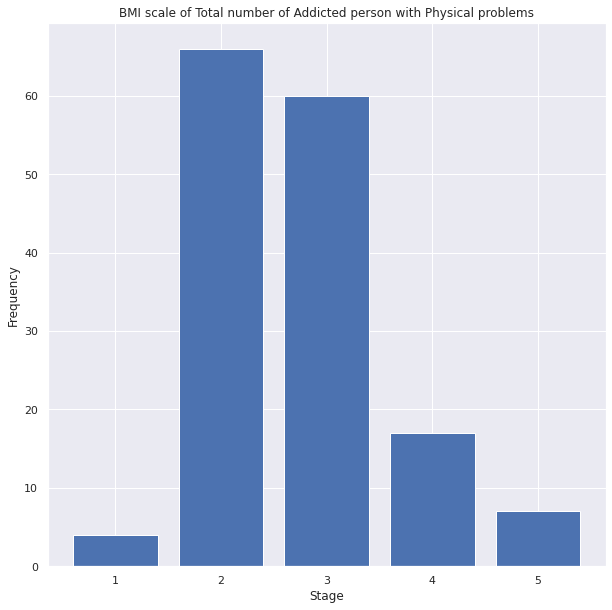

In [69]:
one = two = three= four = five = 0
for val in stage:
  if val == 1: one +=1
  elif val == 2: two += 1
  elif val == 3: three += 1
  elif val == 4: four += 1
  else: five += 1

x_axis = [1, 2, 3, 4, 5]
y_axis = [one, two, three, four, five]

plt.figure(figsize=(10, 10))
plt.bar(x_axis, y_axis)
plt.xlabel('Stage')
plt.ylabel('Frequency')
plt.title('BMI scale of Total number of Addicted person with Physical problems')
plt.show()

In [70]:
#percentage
print('Stage- BMI')
print('-'*30)
print('Very low : {:.2f}%'.format((one/154)*100))
print('Low: {:.2f}%'.format((two/154)*100))
print('Normal: {:.2f}%'.format((three/154)*100))
print('High: {:.2f}%'.format((four/154)*100))
print('Very high: {:.2f}%'.format((five/154)*100))

Stage- BMI
------------------------------
Very low : 2.60%
Low: 42.86%
Normal: 38.96%
High: 11.04%
Very high: 4.55%


In [71]:
#relationship between addiction and BMI
from scipy.stats import ttest_ind
addiction_mean = np.mean(np.array(df['addictionIndicator'].values.tolist()))
BMIstatus_mean = np.mean(np.array(df['BMIstatus'].values.tolist()))
print("addiction mean value:",addiction_mean)
print("BMI status mean value:",BMIstatus_mean)
addiction_std = np.std(np.array(df['addictionIndicator'].values.tolist()))
BMIstatus_std = np.std(np.array(df['BMIstatus'].values.tolist()))
print("addiction std value:",addiction_std)
print("BMI status std value:",BMIstatus_std)
ttest,pval = ttest_ind(np.array(df['addictionIndicator'].values.tolist()),np.array(df['BMIstatus'].values.tolist()))
print('t-test',ttest)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

addiction mean value: 0.4344978165938865
BMI status mean value: 2.4541484716157207
addiction std value: 0.49569089558820006
BMI status std value: 0.8404837423696072
t-test -44.247421437343405
p-value 1.8962437793099884e-229
we reject null hypothesis


In [72]:
idx = 0
stage = []
for ad in df['addictionIndicator']:
  if ad == 1:
    stage.append(df['tendToCocurricularActivities'][idx])

  idx += 1

print(stage)
print(len(stage))

[2, 3, 2, 3, 3, 3, 3, 2, 3, 3, 2, 3, 2, 3, 3, 2, 3, 3, 3, 2, 3, 3, 4, 3, 3, 3, 3, 2, 3, 3, 4, 2, 3, 2, 2, 2, 3, 2, 3, 3, 3, 2, 3, 3, 1, 2, 3, 2, 2, 4, 2, 2, 1, 5, 3, 3, 3, 3, 3, 2, 3, 2, 3, 4, 5, 2, 3, 3, 2, 2, 3, 2, 2, 2, 2, 2, 2, 2, 1, 3, 2, 3, 1, 3, 3, 3, 2, 2, 2, 1, 2, 3, 2, 2, 1, 3, 3, 3, 3, 2, 1, 2, 4, 4, 4, 4, 4, 4, 3, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 1, 3, 2, 1, 2, 2, 2, 2, 2, 1, 3, 4, 4, 3, 3, 4, 3, 3, 2, 2, 2, 3, 3, 4, 2, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 4, 3, 4, 1, 4, 2, 3, 2, 2, 3, 3, 3, 2, 2, 2, 2, 3, 5, 4, 2, 3, 1, 1, 2, 2, 3, 1, 1, 4, 3, 5, 5, 5, 4, 3, 4, 1, 1, 3, 2, 2]
199


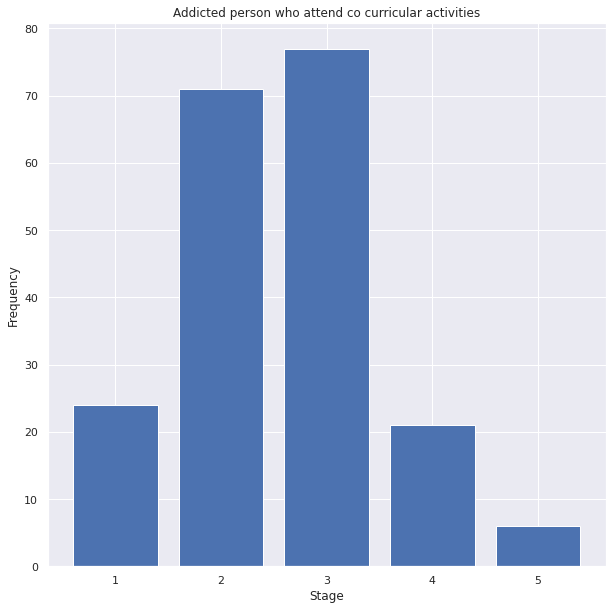

In [73]:
one = two = three= four = five = 0
for val in stage:
  if val == 1: one +=1
  elif val == 2: two += 1
  elif val == 3: three += 1
  elif val == 4: four += 1
  else: five += 1

x_axis = [1, 2, 3, 4, 5]
y_axis = [one, two, three, four, five]

plt.figure(figsize=(10, 10))
plt.bar(x_axis, y_axis)
plt.xlabel('Stage')
plt.ylabel('Frequency')
plt.title('Addicted person who attend co curricular activities')
plt.show()

In [74]:
#percentage
print('Stage- co curricular')
print('-'*30)
print('Never: {:.2f}%'.format((one/199)*100))
print('Rarely: {:.2f}%'.format((two/199)*100))
print('Sometimes: {:.2f}%'.format((three/199)*100))
print('Often: {:.2f}%'.format((four/199)*100))
print('Very Often: {:.2f}%'.format((five/199)*100))

Stage- co curricular
------------------------------
Never: 12.06%
Rarely: 35.68%
Sometimes: 38.69%
Often: 10.55%
Very Often: 3.02%


In [75]:
#relationship between addiction and co curriculars
from scipy.stats import ttest_ind
addiction_mean = np.mean(np.array(df['addictionIndicator'].values.tolist()))
tendToCocurricularActivities_mean = np.mean(np.array(df['tendToCocurricularActivities'].values.tolist()))
print("addiction mean value:",addiction_mean)
print("active with Co curricular Activities status mean value:",tendToCocurricularActivities_mean)
addiction_std = np.std(np.array(df['addictionIndicator'].values.tolist()))
tendToCocurricularActivities_std = np.std(np.array(df['tendToCocurricularActivities'].values.tolist()))
print("addiction std value:",addiction_std)
print("active with Co curricular Activities std value:",tendToCocurricularActivities_std)
ttest,pval = ttest_ind(np.array(df['addictionIndicator'].values.tolist()),np.array(df['tendToCocurricularActivities'].values.tolist()))
print('t-test',ttest)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

addiction mean value: 0.4344978165938865
active with Co curricular Activities status mean value: 2.609170305676856
addiction std value: 0.49569089558820006
active with Co curricular Activities std value: 0.958803708681815
t-test -43.07114184541558
p-value 3.236574964724974e-222
we reject null hypothesis


In [76]:
idx = 0
stage = []
for ad in df['addictionIndicator']:
  if ad == 1:
    stage.append(df['tendToPresentClass'][idx])

  idx += 1

print(stage)
print(len(stage))

[3, 3, 4, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 5, 2, 4, 3, 3, 3, 4, 1, 3, 3, 3, 3, 3, 3, 4, 3, 5, 3, 3, 4, 4, 5, 3, 3, 2, 3, 3, 3, 3, 2, 3, 4, 4, 3, 4, 4, 3, 2, 4, 4, 1, 3, 3, 2, 2, 4, 3, 3, 2, 4, 4, 2, 2, 5, 2, 2, 3, 3, 3, 2, 3, 3, 3, 3, 3, 4, 2, 3, 3, 4, 4, 3, 3, 4, 3, 3, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 4, 4, 3, 3, 4, 3, 3, 5, 5, 4, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 4, 3, 2, 3, 3, 3, 4, 3, 3, 2, 3, 2, 3, 3, 2, 2, 3, 2, 3, 3, 2, 3, 2, 2, 2, 3, 4, 5, 4, 4, 5, 5, 3, 4, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 3, 3, 3, 3, 2, 2, 2, 4, 5, 4, 3, 4, 1, 2, 4, 2, 3, 4, 5, 3, 1, 4, 4, 5, 5, 5, 5, 5, 2, 2, 1, 4, 3, 3, 4, 2]
199


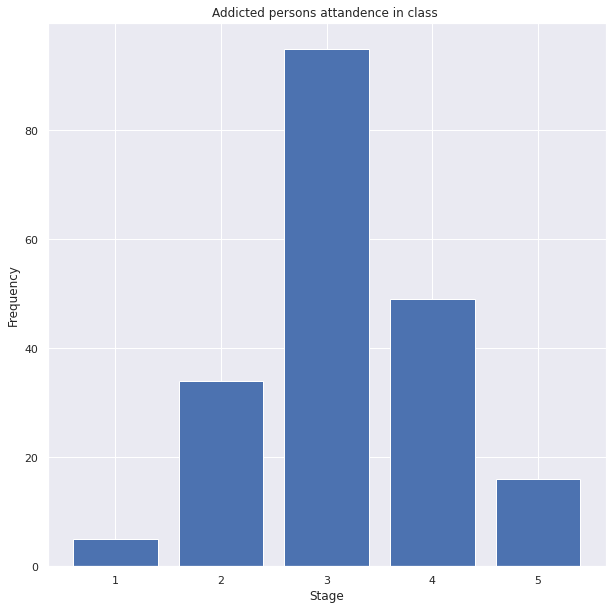

In [77]:
one = two = three= four = five = 0
for val in stage:
  if val == 1: one +=1
  elif val == 2: two += 1
  elif val == 3: three += 1
  elif val == 4: four += 1
  else: five += 1

x_axis = [1, 2, 3, 4, 5]
y_axis = [one, two, three, four, five]

plt.figure(figsize=(10, 10))
plt.bar(x_axis, y_axis)
plt.xlabel('Stage')
plt.ylabel('Frequency')
plt.title('Addicted persons attandence in class ')
plt.show()

In [78]:
#percentage
print('Stage- Attendence')
print('-'*30)
print('Never: {:.2f}%'.format((one/199)*100))
print('Rarely: {:.2f}%'.format((two/199)*100))
print('Sometimes: {:.2f}%'.format((three/199)*100))
print('Often: {:.2f}%'.format((four/199)*100))
print('Very Often: {:.2f}%'.format((five/199)*100))

Stage- Attendence
------------------------------
Never: 2.51%
Rarely: 17.09%
Sometimes: 47.74%
Often: 24.62%
Very Often: 8.04%


In [79]:
#relationship between addiction and class presence 
from scipy.stats import ttest_ind
addiction_mean = np.mean(np.array(df['addictionIndicator'].values.tolist()))
tendToPresentClass_mean = np.mean(np.array(df['tendToPresentClass'].values.tolist()))
print("addiction mean value:",addiction_mean)
print("class presence mean value:",tendToPresentClass_mean)
addiction_std = np.std(np.array(df['addictionIndicator'].values.tolist()))
tendToPresentClass_std = np.std(np.array(df['tendToPresentClass'].values.tolist()))
print("addiction std value:",addiction_std)
print("class presence std value:",tendToPresentClass_std)
ttest,pval = ttest_ind(np.array(df['addictionIndicator'].values.tolist()),np.array(df['tendToPresentClass'].values.tolist()))
print('t-test',ttest)
print("p-value",pval)
if pval <0.05:
  print("we reject null hypothesis")
else:
  print("we accept null hypothesis")

addiction mean value: 0.4344978165938865
class presence mean value: 2.7161572052401746
addiction std value: 0.49569089558820006
class presence std value: 1.0889484899270763
t-test -40.76716055243315
p-value 7.402470195664573e-208
we reject null hypothesis


In [80]:
idx = 0
stage = []
for ad in df['addictionIndicator']:
  if ad == 1:
    stage.append(df['cgpa'][idx])

  idx += 1

print(stage)
print(len(stage))

['3.00-3.50', '2.50-3.00', '1.50-2.00', '2.50-3.00', '1.50-2.00', '2.00-2.50', '2.00-2.50', '2.00-2.50', '1.50-2.00', '2.50-3.00', '2.50-3.00', '3.50-4.00', '3.00-3.50', '2.00-2.50', '2.50-3.00', '2.50-3.00', '1.50-2.00', '2.50-3.00', '2.50-3.00', '1.50-2.00', '3.50-4.00', '2.50-3.00', '3.50-4.00', '2.50-3.00', '3.00-3.50', '2.50-3.00', '2.50-3.00', '2.00-2.50', '2.50-3.00', '2.00-2.50', '3.50-4.00', '2.50-3.00', '2.00-2.50', '1.50-2.00', '1.50-2.00', '1.50-2.00', '2.50-3.00', '2.50-3.00', '2.50-3.00', '2.50-3.00', '2.50-3.00', '2.50-3.00', '2.50-3.00', '2.50-3.00', '2.00-2.50', '1.50-2.00', '2.50-3.00', '2.00-2.50', '1.50-2.00', '3.00-3.50', '3.00-3.50', '2.50-3.00', '2.50-3.00', '3.00-3.50', '3.50-4.00', '3.00-3.50', '3.50-4.00', '3.00-3.50', '3.00-3.50', '2.50-3.00', '3.00-3.50', '1.50-2.00', '2.50-3.00', '3.50-4.00', '2.00-2.50', '3.00-3.50', '2.00-2.50', '2.50-3.00', '3.00-3.50', '2.50-3.00', '2.50-3.00', '2.50-3.00', '2.50-3.00', '2.50-3.00', '2.50-3.00', '2.50-3.00', '2.50-3.00'

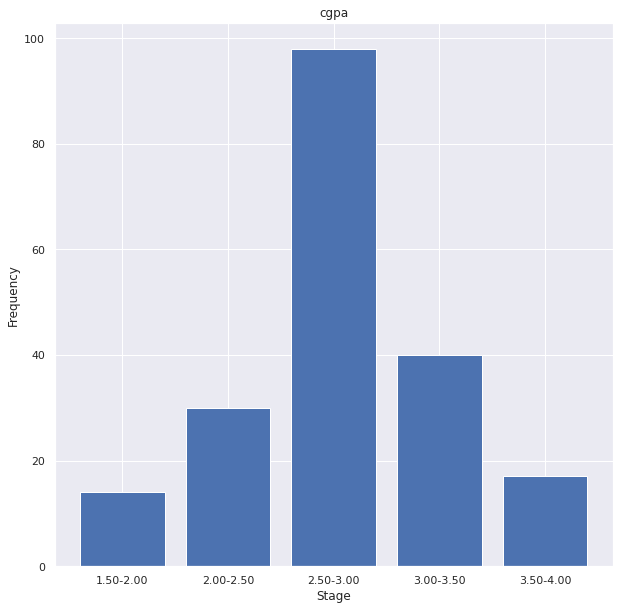

In [81]:
one = two = three= four = five = 0
for val in stage:
  if val == '1.50-2.00': one +=1
  elif val == '2.00-2.50': two += 1
  elif val == '2.50-3.00': three += 1
  elif val == '3.00-3.50': four += 1
  else: five += 1

x_axis = ['1.50-2.00', '2.00-2.50', '2.50-3.00', '3.00-3.50', '3.50-4.00']
y_axis = [one, two, three, four, five]

plt.figure(figsize=(10, 10))
plt.bar(x_axis, y_axis)
plt.xlabel('Stage')
plt.ylabel('Frequency')
plt.title('cgpa')
plt.show()

In [82]:
#percentage
print('Stage- Cgpa')
print('-'*30)
print('1.50-2.00: {:.2f}%'.format((one/199)*100))
print('2.00-2.50: {:.2f}%'.format((two/199)*100))
print('2.50-3.00: {:.2f}%'.format((three/199)*100))
print('3.00-3.50: {:.2f}%'.format((four/199)*100))
print('3.50-4.00: {:.2f}%'.format((five/199)*100))

Stage- Cgpa
------------------------------
1.50-2.00: 7.04%
2.00-2.50: 15.08%
2.50-3.00: 49.25%
3.00-3.50: 20.10%
3.50-4.00: 8.54%


In [83]:
#first 20 column x
#mentaldisorder 34 is y
x=df.iloc[:, 0:20]
y=df.iloc[:,34]
y

0      0
1      0
2      0
3      0
4      0
      ..
453    0
454    0
455    0
456    0
457    0
Name: mentalDisorder, Length: 458, dtype: int64

In [84]:
x = np.array(x.values.tolist())
print(x)

[[2 2 2 ... 3 3 3]
 [3 2 3 ... 2 2 2]
 [4 4 3 ... 5 4 3]
 ...
 [4 4 3 ... 2 3 1]
 [2 5 2 ... 3 1 2]
 [2 2 1 ... 2 5 2]]


In [85]:
x.shape

(458, 20)

In [86]:
y = np.array(y.values.tolist())
print(y)

[0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0
 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0
 0 0 0 1 1 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [87]:
y.shape

(458,)

In [88]:
from sklearn.preprocessing import OneHotEncoder
ohe=OneHotEncoder(sparse=False)
one_hot_y=ohe.fit_transform(df[['mentalDisorder']])

In [89]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
linreg=LinearRegression()
linreg.fit(x_train,y_train)
y_pred=linreg.predict(x_test)
y_pred

array([ 0.28096661,  0.51422621,  0.25802371,  0.3119574 ,  0.11893395,
       -0.13040055,  0.26751821,  0.53773443,  0.318673  ,  0.71372598,
        0.00767111, -0.0453788 , -0.12976696,  0.55118985,  0.15074305,
        0.13700841,  0.0009237 ,  0.45057236,  0.54348954,  0.28163104,
        0.05993937,  0.26858746,  0.28392872,  0.30203306,  0.75521583,
        0.14707011, -0.15951123, -0.18070014,  0.13471561,  0.40810199,
       -0.32407234,  0.09989994,  0.18465284,  0.39817662,  0.23328537,
       -0.12880984,  0.0544191 ,  0.32968481,  0.46163872,  0.33976557,
       -0.07192682, -0.24327751,  0.08027453, -0.09080038, -0.23738292,
        0.16907827,  0.26266395,  0.49884987, -0.10049696,  0.49817399,
        0.29048606,  0.25803138,  0.41928293,  0.35122406, -0.06869609,
       -0.04376796,  0.41744872, -0.19061236, -0.04635361,  0.11175558,
       -0.13655928, -0.06644095,  0.63945852, -0.27459869,  0.0626663 ,
        0.17658885,  0.17435745,  0.10926002,  0.03290204,  0.05

In [90]:
#failure 
Accuracy=r2_score(y_test,y_pred)*100
print(" Accuracy of the model is %.2f" %Accuracy)

 Accuracy of the model is 33.42


In [91]:
#neural
x=df.iloc[:, 0:20]
y=df.iloc[:,35]
y

0      0
1      0
2      1
3      0
4      1
      ..
453    0
454    0
455    0
456    0
457    0
Name: physicalDisorder, Length: 458, dtype: int64

In [92]:
x = np.array(x.values.tolist())
y = np.array(y.values.tolist())

In [93]:
print('Input sequences')
print('-'*15)
print(x)

print('\nPredicted sequences')
print('-'*20)
print(y)

Input sequences
---------------
[[2 2 2 ... 3 3 3]
 [3 2 3 ... 2 2 2]
 [4 4 3 ... 5 4 3]
 ...
 [4 4 3 ... 2 3 1]
 [2 5 2 ... 3 1 2]
 [2 2 1 ... 2 5 2]]

Predicted sequences
--------------------
[0 0 1 0 1 0 0 0 0 1 0 1 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0
 1 0 0 1 0 0 1 1 0 1 1 1 0 1 0 1 1 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 1 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 0 0 0 0 1 0 1 0 1 1 0 0 1 0 1 0 1 0 0 0 1 1
 0 0 0 0 0 1 0 0 0 1 0 1 0 1 0 0 1 0 0 0 1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 1 1 1 0 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 0
 0 1 1 1 0 1 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 0 1 1 1 1 0 1 1
 1 1 1 0 1 0 1 0 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 1 0 1
 1 1 0 0 1 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 0 0 1 1 0 0 0

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, shuffle=True)

In [95]:
print('Shape of train input:', x_train.shape)
print('Shape of train output:', y_train.shape)
print('Shape of test input:', x_test.shape)
print('Shape of test output:', y_test.shape)

Shape of train input: (366, 20)
Shape of train output: (366,)
Shape of test input: (92, 20)
Shape of test output: (92,)


In [96]:
# NEURAL NETWORK

# import tensorflow as tf
# from tensorflow import keras
from tensorflow.keras.layers import Dense, LSTM
from tensorflow.keras import Sequential
%matplotlib inline

In [97]:
# neural network with only one hidden layer (hidden units 100 but epochs 20) (BEST TRAINING ACCURACY)
# model = Sequential([
#     keras.layers.Dense(100, input_shape=(20,), activation='relu'),
#     keras.layers.Dense(2, activation='sigmoid')
# ])

model = Sequential()
model.add(LSTM(64, input_shape=(20, 1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                16896     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 2)                 130       
                                                                 
Total params: 21,186
Trainable params: 21,186
Non-trainable params: 0
_________________________________________________________________


In [98]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [99]:
model.fit(x_train, y_train, epochs=244, validation_data=(x_test, y_test))

Epoch 1/244
12/12 [==============================] - 3s 74ms/step - loss: 0.6701 - accuracy: 0.5792 - val_loss: 0.6914 - val_accuracy: 0.4891
Epoch 2/244
12/12 [==============================] - 0s 19ms/step - loss: 0.6205 - accuracy: 0.6366 - val_loss: 0.5330 - val_accuracy: 0.7935
Epoch 3/244
12/12 [==============================] - 0s 16ms/step - loss: 0.5234 - accuracy: 0.7869 - val_loss: 0.4640 - val_accuracy: 0.7826
Epoch 4/244
12/12 [==============================] - 0s 17ms/step - loss: 0.4736 - accuracy: 0.7842 - val_loss: 0.5704 - val_accuracy: 0.7283
Epoch 5/244
12/12 [==============================] - 0s 16ms/step - loss: 0.4627 - accuracy: 0.8005 - val_loss: 0.4205 - val_accuracy: 0.8043
Epoch 6/244
12/12 [==============================] - 0s 15ms/step - loss: 0.4479 - accuracy: 0.7842 - val_loss: 0.4413 - val_accuracy: 0.7935
Epoch 7/244
12/12 [==============================] - 0s 16ms/step - loss: 0.4365 - accuracy: 0.8005 - val_loss: 0.4372 - val_accuracy: 0.8043
Epoch 

In [100]:
# training accuracy was .7851
loss, acc = model.evaluate(x_test,y_test)
print('Loss: {:.4f}'.format(loss))
print('Accuracy: {:.2f}%'.format(acc*100))

3/3 [==============================] - 0s 7ms/step - loss: 1.2684 - accuracy: 0.8152
Loss: 1.2684
Accuracy: 81.52%


In [101]:
i = 80
print('Input values')
print('-'*15)
print(x_test[i])
y_pred = model.predict(np.array([x_test[i]]))
y_pred = np.argmax(y_pred, axis=-1)

if y_pred[0] == 0: print('\nNo Physical disorder.')
else: print('\nPhysical disorder.')

Input values
---------------
[2 2 3 3 3 2 2 4 4 4 3 4 4 3 3 3 3 3 3 3]

Physical disorder.


In [102]:
y_prediction = model.predict(x_test)
y_prediction = np.argmax(y_prediction, axis=-1)
print(y_prediction)

[0 0 1 0 1 1 0 1 0 1 0 1 0 0 1 1 0 1 1 0 1 1 0 0 1 1 0 0 1 1 0 0 1 0 0 0 0
 0 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 1
 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0]


In [103]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_mat = confusion_matrix(y_test, y_prediction)
print(cf_mat)

[[39  6]
 [11 36]]


In [104]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_prediction)
print(cr)

              precision    recall  f1-score   support

           0       0.78      0.87      0.82        45
           1       0.86      0.77      0.81        47

    accuracy                           0.82        92
   macro avg       0.82      0.82      0.82        92
weighted avg       0.82      0.82      0.81        92



In [105]:
#neural mentaldisorder
x=df.iloc[:, 0:20]
y=df.iloc[:,34]
y

0      0
1      0
2      0
3      0
4      0
      ..
453    0
454    0
455    0
456    0
457    0
Name: mentalDisorder, Length: 458, dtype: int64

In [106]:
x = np.array(x.values.tolist())
y = np.array(y.values.tolist())

print('Input sequences')
print('-'*15)
print(x)

print('\nPredicted sequences')
print('-'*20)
print(y)

Input sequences
---------------
[[2 2 2 ... 3 3 3]
 [3 2 3 ... 2 2 2]
 [4 4 3 ... 5 4 3]
 ...
 [4 4 3 ... 2 3 1]
 [2 5 2 ... 3 1 2]
 [2 2 1 ... 2 5 2]]

Predicted sequences
--------------------
[0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 0 1 0
 1 1 1 0 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0
 1 1 0 1 0 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [108]:
print('Shape of train input:', x_train.shape)
print('Shape of train output:', y_train.shape)
print('Shape of test input:', x_test.shape)
print('Shape of test output:', y_test.shape)

Shape of train input: (366, 20)
Shape of train output: (366,)
Shape of test input: (92, 20)
Shape of test output: (92,)


In [109]:
# neural network with only one hidden layer (hidden units 100 but epochs 20) (BEST TRAINING ACCURACY)
model = Sequential()
model.add(LSTM(64, input_shape=(20, 1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 64)                16896     
                                                                 
 dense_2 (Dense)             (None, 64)                4160      
                                                                 
 dense_3 (Dense)             (None, 2)                 130       
                                                                 
Total params: 21,186
Trainable params: 21,186
Non-trainable params: 0
_________________________________________________________________


In [110]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=244, validation_data=(x_test, y_test))

Epoch 1/244
12/12 [==============================] - 3s 65ms/step - loss: 0.5299 - accuracy: 0.8306 - val_loss: 0.6103 - val_accuracy: 0.7500
Epoch 2/244
12/12 [==============================] - 0s 16ms/step - loss: 0.4206 - accuracy: 0.8306 - val_loss: 0.4553 - val_accuracy: 0.7500
Epoch 3/244
12/12 [==============================] - 0s 15ms/step - loss: 0.3002 - accuracy: 0.8443 - val_loss: 0.2694 - val_accuracy: 0.8913
Epoch 4/244
12/12 [==============================] - 0s 16ms/step - loss: 0.1672 - accuracy: 0.9344 - val_loss: 0.1422 - val_accuracy: 0.9348
Epoch 5/244
12/12 [==============================] - 0s 14ms/step - loss: 0.1503 - accuracy: 0.9208 - val_loss: 0.1914 - val_accuracy: 0.9022
Epoch 6/244
12/12 [==============================] - 0s 15ms/step - loss: 0.1264 - accuracy: 0.9481 - val_loss: 0.1361 - val_accuracy: 0.9565
Epoch 7/244
12/12 [==============================] - 0s 16ms/step - loss: 0.1280 - accuracy: 0.9426 - val_loss: 0.1536 - val_accuracy: 0.9130
Epoch 

In [111]:
# training accuracy was .8370
loss, acc = model.evaluate(x_test,y_test)
print('Loss: {:.4f}'.format(loss))
print('Accuracy: {:.2f}%'.format(acc*100))

3/3 [==============================] - 0s 7ms/step - loss: 0.2073 - accuracy: 0.9022
Loss: 0.2073
Accuracy: 90.22%


In [112]:
i = 80
print('Input values')
print('-'*15)
print(x_test[i])
y_pred = model.predict(np.array([x_test[i]]))
y_pred = np.argmax(y_pred, axis=-1)

if y_pred[0] == 0: print('\nNo Mental disorder.')
else: print('\nMental disorder.')

Input values
---------------
[2 2 3 3 3 2 2 4 4 4 3 4 4 3 3 3 3 3 3 3]

No Mental disorder.


In [113]:
y_prediction = model.predict(x_test)
y_prediction = np.argmax(y_prediction, axis=-1)
print(y_prediction)

[0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 1 0 1 0 0 1 0 0 0 0 0 1 0 0 0 0]


In [114]:
cf_mat = confusion_matrix(y_test, y_prediction)
print(cf_mat)

[[67  2]
 [ 7 16]]


In [115]:
cr = classification_report(y_test, y_prediction)
print(cr)

              precision    recall  f1-score   support

           0       0.91      0.97      0.94        69
           1       0.89      0.70      0.78        23

    accuracy                           0.90        92
   macro avg       0.90      0.83      0.86        92
weighted avg       0.90      0.90      0.90        92



In [116]:
#neural addiction
x=df.iloc[:, 0:20]
y=df.iloc[:,33]
y

0      0
1      0
2      1
3      0
4      1
      ..
453    0
454    1
455    0
456    0
457    0
Name: addictionIndicator, Length: 458, dtype: int64

In [117]:
x = np.array(x.values.tolist())
y = np.array(y.values.tolist())

print('Input sequences')
print('-'*15)
print(x)

print('\nPredicted sequences')
print('-'*20)
print(y)

Input sequences
---------------
[[2 2 2 ... 3 3 3]
 [3 2 3 ... 2 2 2]
 [4 4 3 ... 5 4 3]
 ...
 [4 4 3 ... 2 3 1]
 [2 5 2 ... 3 1 2]
 [2 2 1 ... 2 5 2]]

Predicted sequences
--------------------
[0 0 1 0 1 0 0 0 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 1 1 0 1 1 0
 1 0 0 1 0 0 1 0 0 1 0 1 0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 0 0 0 0 1 0 0 1 0 0
 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 0 0 0 0 0 0 0 0 0 0 1 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 0 1 0 1 0 0 0 0 1
 0 0 0 0 0 1 0 0 0 1 0 0 1 1 0 0 1 0 0 1 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0
 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 0 0 0 0
 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 1 0 1 1 0 1 0 1 0 1 0 1
 1 1 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 1 1 1 0 0 1 0 1 0 1 1 1 1 1 1 0 0 0 0
 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1 0 1 0 0 0 0

In [118]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [119]:
print('Shape of train input:', x_train.shape)
print('Shape of train output:', y_train.shape)
print('Shape of test input:', x_test.shape)
print('Shape of test output:', y_test.shape)

Shape of train input: (366, 20)
Shape of train output: (366,)
Shape of test input: (92, 20)
Shape of test output: (92,)


In [120]:
# neural network with only one hidden layer (hidden units 100 but epochs 20) (BEST TRAINING ACCURACY)
model = Sequential()
model.add(LSTM(64, input_shape=(20, 1)))
model.add(Dense(64, activation='relu'))
model.add(Dense(2, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_2 (LSTM)               (None, 64)                16896     
                                                                 
 dense_4 (Dense)             (None, 64)                4160      
                                                                 
 dense_5 (Dense)             (None, 2)                 130       
                                                                 
Total params: 21,186
Trainable params: 21,186
Non-trainable params: 0
_________________________________________________________________


In [121]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model.fit(x_train, y_train, epochs=244, validation_data=(x_test, y_test))

Epoch 1/244
12/12 [==============================] - 3s 104ms/step - loss: 0.6689 - accuracy: 0.5738 - val_loss: 0.6270 - val_accuracy: 0.8152
Epoch 2/244
12/12 [==============================] - 0s 15ms/step - loss: 0.5663 - accuracy: 0.8306 - val_loss: 0.4384 - val_accuracy: 0.9239
Epoch 3/244
12/12 [==============================] - 0s 16ms/step - loss: 0.3551 - accuracy: 0.8934 - val_loss: 0.1816 - val_accuracy: 0.9239
Epoch 4/244
12/12 [==============================] - 0s 17ms/step - loss: 0.2052 - accuracy: 0.9071 - val_loss: 0.1119 - val_accuracy: 0.9457
Epoch 5/244
12/12 [==============================] - 0s 17ms/step - loss: 0.1321 - accuracy: 0.9426 - val_loss: 0.0915 - val_accuracy: 0.9457
Epoch 6/244
12/12 [==============================] - 0s 15ms/step - loss: 0.0899 - accuracy: 0.9672 - val_loss: 0.0751 - val_accuracy: 0.9674
Epoch 7/244
12/12 [==============================] - 0s 16ms/step - loss: 0.0974 - accuracy: 0.9617 - val_loss: 0.1006 - val_accuracy: 0.9457
Epoch

In [122]:
# training accuracy was .8696
loss, acc = model.evaluate(x_test,y_test)
print('Loss: {:.4f}'.format(loss))
print('Accuracy: {:.2f}%'.format(acc*100))

3/3 [==============================] - 0s 7ms/step - loss: 0.0371 - accuracy: 0.9674
Loss: 0.0371
Accuracy: 96.74%


In [123]:
i = 80
print('Input values')
print('-'*15)
print(x_test[i])
y_pred = model.predict(np.array([x_test[i]]))
y_pred = np.argmax(y_pred, axis=-1)

if y_pred[0] == 0: print('\nNo Addiction.')
else: print('\nAddiction.')

Input values
---------------
[2 2 3 3 3 2 2 4 4 4 3 4 4 3 3 3 3 3 3 3]

Addiction.


In [124]:
y_prediction = model.predict(x_test)
y_prediction = np.argmax(y_prediction, axis=-1)

In [125]:
print(y_prediction)

[0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1
 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1
 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0]


In [126]:
#Generate the confusion matrix
cf_mat = confusion_matrix(y_test, y_prediction)
print(cf_mat)

[[45  3]
 [ 0 44]]


In [127]:
cr = classification_report(y_test, y_prediction)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        48
           1       0.94      1.00      0.97        44

    accuracy                           0.97        92
   macro avg       0.97      0.97      0.97        92
weighted avg       0.97      0.97      0.97        92



In [128]:
#Import scikit-learn dataset library
from sklearn import datasets

In [129]:
#svm physical
x=df.iloc[:, 0:20]
y=df.iloc[:,35]
y

0      0
1      0
2      1
3      0
4      1
      ..
453    0
454    0
455    0
456    0
457    0
Name: physicalDisorder, Length: 458, dtype: int64

In [130]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, shuffle=True)

In [131]:
print('Shape of train input:', x_train.shape)
print('Shape of train output:', y_train.shape)
print('Shape of test input:', x_test.shape)
print('Shape of test output:', y_test.shape)

Shape of train input: (366, 20)
Shape of train output: (366,)
Shape of test input: (92, 20)
Shape of test output: (92,)


In [132]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [133]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8043478260869565


In [134]:
y_prediction = model.predict(x_test)
y_prediction = np.argmax(y_prediction, axis=-1)
print(y_prediction)

[0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1
 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1
 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0]


In [135]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_mat = confusion_matrix(y_test, y_prediction)
print(cf_mat)

[[36  9]
 [ 9 38]]


In [136]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_prediction)
print(cr)

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        45
           1       0.81      0.81      0.81        47

    accuracy                           0.80        92
   macro avg       0.80      0.80      0.80        92
weighted avg       0.80      0.80      0.80        92



In [137]:
#svm mental disorder
x=df.iloc[:, 0:20]
y=df.iloc[:,34]
y

0      0
1      0
2      0
3      0
4      0
      ..
453    0
454    0
455    0
456    0
457    0
Name: mentalDisorder, Length: 458, dtype: int64

In [138]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, shuffle=True)

In [139]:
print('Shape of train input:', x_train.shape)
print('Shape of train output:', y_train.shape)
print('Shape of test input:', x_test.shape)
print('Shape of test output:', y_test.shape)

Shape of train input: (366, 20)
Shape of train output: (366,)
Shape of test input: (92, 20)
Shape of test output: (92,)


In [140]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [141]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9456521739130435


In [142]:
y_prediction = model.predict(x_test)
y_prediction = np.argmax(y_prediction, axis=-1)
print(y_prediction)

[0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1
 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1
 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0]


In [143]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_mat = confusion_matrix(y_test, y_prediction)
print(cf_mat)

[[45 24]
 [ 0 23]]


In [144]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_prediction)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.65      0.79        69
           1       0.49      1.00      0.66        23

    accuracy                           0.74        92
   macro avg       0.74      0.83      0.72        92
weighted avg       0.87      0.74      0.76        92



In [145]:
#svm physical
x=df.iloc[:, 0:20]
y=df.iloc[:,33]
y

0      0
1      0
2      1
3      0
4      1
      ..
453    0
454    1
455    0
456    0
457    0
Name: addictionIndicator, Length: 458, dtype: int64

In [146]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1, shuffle=True)

In [147]:
print('Shape of train input:', x_train.shape)
print('Shape of train output:', y_train.shape)
print('Shape of test input:', x_test.shape)
print('Shape of test output:', y_test.shape)

Shape of train input: (366, 20)
Shape of train output: (366,)
Shape of test input: (92, 20)
Shape of test output: (92,)


In [148]:
#Import svm model
from sklearn import svm
#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(x_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [149]:
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9891304347826086


In [150]:
y_prediction = model.predict(x_test)
y_prediction = np.argmax(y_prediction, axis=-1)
print(y_prediction)

[0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1
 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1
 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0]


In [151]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_mat = confusion_matrix(y_test, y_prediction)
print(cf_mat)

[[45  3]
 [ 0 44]]


In [152]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_prediction)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        48
           1       0.94      1.00      0.97        44

    accuracy                           0.97        92
   macro avg       0.97      0.97      0.97        92
weighted avg       0.97      0.97      0.97        92



In [153]:
#Import scikit-learn dataset library
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier

In [154]:
#random physical
x=df.iloc[:, 0:20]
y=df.iloc[:,35]
y

0      0
1      0
2      1
3      0
4      1
      ..
453    0
454    0
455    0
456    0
457    0
Name: physicalDisorder, Length: 458, dtype: int64

In [155]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [156]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [157]:
y_pred_rfc = rfc.predict(x_test)

In [158]:
RFCRes = metrics.accuracy_score(y_test, y_pred_rfc)
print("Accuracy of Random Forest Classifiers: {0:.2f}%".format(RFCRes * 100))

Accuracy of Random Forest Classifiers: 78.99%


In [159]:
print("Classification Report of Random Forest Classifier:\n\n", metrics.classification_report(y_test, y_pred_rfc))

Classification Report of Random Forest Classifier:

               precision    recall  f1-score   support

           0       0.78      0.87      0.82        78
           1       0.80      0.68      0.74        60

    accuracy                           0.79       138
   macro avg       0.79      0.78      0.78       138
weighted avg       0.79      0.79      0.79       138



In [160]:
#Import scikit-learn dataset library
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier

In [161]:
#random mental
x=df.iloc[:, 0:20]
y=df.iloc[:,34]
y

0      0
1      0
2      0
3      0
4      0
      ..
453    0
454    0
455    0
456    0
457    0
Name: mentalDisorder, Length: 458, dtype: int64

In [162]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [163]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [164]:
y_pred_rfc = rfc.predict(x_test)

In [165]:
RFCRes = metrics.accuracy_score(y_test, y_pred_rfc)
print("Accuracy of Random Forest Classifiers: {0:.2f}%".format(RFCRes * 100))

Accuracy of Random Forest Classifiers: 94.93%


In [166]:
print("Classification Report of Random Forest Classifier:\n\n", metrics.classification_report(y_test, y_pred_rfc))

Classification Report of Random Forest Classifier:

               precision    recall  f1-score   support

           0       0.97      0.97      0.97       116
           1       0.83      0.86      0.84        22

    accuracy                           0.95       138
   macro avg       0.90      0.91      0.91       138
weighted avg       0.95      0.95      0.95       138



In [167]:
#Import scikit-learn dataset library
from sklearn import datasets
from sklearn.ensemble import RandomForestClassifier

In [168]:
#random addict
x=df.iloc[:, 0:20]
y=df.iloc[:,33]
y

0      0
1      0
2      1
3      0
4      1
      ..
453    0
454    1
455    0
456    0
457    0
Name: addictionIndicator, Length: 458, dtype: int64

In [169]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [170]:
rfc = RandomForestClassifier(n_estimators=100)
rfc.fit(x_train,y_train)

RandomForestClassifier()

In [171]:
y_pred_rfc = rfc.predict(x_test)

In [172]:
RFCRes = metrics.accuracy_score(y_test, y_pred_rfc)
print("Accuracy of Random Forest Classifiers: {0:.2f}%".format(RFCRes * 100))

Accuracy of Random Forest Classifiers: 91.30%


In [173]:
print("Classification Report of Random Forest Classifier:\n\n", metrics.classification_report(y_test, y_pred_rfc))

Classification Report of Random Forest Classifier:

               precision    recall  f1-score   support

           0       0.88      0.97      0.93        76
           1       0.96      0.84      0.90        62

    accuracy                           0.91       138
   macro avg       0.92      0.91      0.91       138
weighted avg       0.92      0.91      0.91       138



In [174]:
#tree PHYSICAL
x=df.iloc[:, 0:20]
y=df.iloc[:,35]
y

0      0
1      0
2      1
3      0
4      1
      ..
453    0
454    0
455    0
456    0
457    0
Name: physicalDisorder, Length: 458, dtype: int64

In [175]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [176]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [177]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7246376811594203


In [178]:
y_prediction = model.predict(x_test)
y_prediction = np.argmax(y_prediction, axis=-1)
print(y_prediction)

[0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1
 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1
 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1]


In [179]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_mat = confusion_matrix(y_test, y_prediction)
print(cf_mat)

[[57 14]
 [12 55]]


In [180]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_prediction)
print(cr)

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        71
           1       0.80      0.82      0.81        67

    accuracy                           0.81       138
   macro avg       0.81      0.81      0.81       138
weighted avg       0.81      0.81      0.81       138



In [181]:
#tree mental
x=df.iloc[:, 0:20]
y=df.iloc[:,34]
y

0      0
1      0
2      0
3      0
4      0
      ..
453    0
454    0
455    0
456    0
457    0
Name: mentalDisorder, Length: 458, dtype: int64

In [182]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [183]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [184]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.927536231884058


In [185]:
y_prediction = model.predict(x_test)
y_prediction = np.argmax(y_prediction, axis=-1)
print(y_prediction)

[0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1
 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1
 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1]


In [186]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_mat = confusion_matrix(y_test, y_prediction)
print(cf_mat)

[[69 34]
 [ 0 35]]


In [187]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_prediction)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.67      0.80       103
           1       0.51      1.00      0.67        35

    accuracy                           0.75       138
   macro avg       0.75      0.83      0.74       138
weighted avg       0.88      0.75      0.77       138



In [188]:
#tree addict
x=df.iloc[:, 0:20]
y=df.iloc[:,33]
y

0      0
1      0
2      1
3      0
4      1
      ..
453    0
454    1
455    0
456    0
457    0
Name: addictionIndicator, Length: 458, dtype: int64

In [189]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 1)

In [190]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf = clf.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(x_test)

In [191]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.927536231884058


In [192]:
y_prediction = model.predict(x_test)
y_prediction = np.argmax(y_prediction, axis=-1)
print(y_prediction)

[0 0 1 0 1 1 0 0 0 1 1 1 0 0 1 1 0 1 1 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 0 1 1
 0 0 1 0 1 0 0 0 1 0 0 1 0 1 1 1 0 1 0 0 1 0 1 0 1 0 0 0 0 1 0 1 1 0 0 0 1
 1 0 1 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 0 1 1 0 1 0 1 0 0 1 0 1 0 0 0 0
 1 0 0 1 1 0 0 0 0 1 1 0 1 1 0 1 0 1 0 1 1 0 1 0 0 0 1]


In [193]:
from sklearn.metrics import confusion_matrix

#Generate the confusion matrix
cf_mat = confusion_matrix(y_test, y_prediction)
print(cf_mat)

[[69  4]
 [ 0 65]]


In [194]:
from sklearn.metrics import classification_report
cr = classification_report(y_test, y_prediction)
print(cr)

              precision    recall  f1-score   support

           0       1.00      0.95      0.97        73
           1       0.94      1.00      0.97        65

    accuracy                           0.97       138
   macro avg       0.97      0.97      0.97       138
weighted avg       0.97      0.97      0.97       138

